<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
pd.set_option('display.max_columns', 15) 

In [2]:
#Importation de la librairie plotly express
import plotly.express as px


In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#print(df.columns.tolist())
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
import warnings
warnings.simplefilter("ignore") #suppression des codes warning

#Importation du fichier web.xlsx
df_web = pd.read_excel("c:/p6/web.xlsx")
df_web.info()
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("c:/p6/erp.xlsx")
df_erp.info()
#print(df_erp.columns.tolist())
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("c:/p6/liaison.xlsx")
df_liaison.info()
#print(df_liaison.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))


Le tableau comporte 825 observation(s) ou article(s)


In [6]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)\n".format(df_erp.shape[1]))
#La nature des données dans chacune des colonnes
print(df_erp.dtypes,'\n')
#Le nombre de valeurs présentes dans chacune des colonnes
for i in list(df_erp.columns.values):
    print('Le nombre de valeurs du champ :',i,'est :',df_erp[i].count())

Le tableau comporte 6 colonne(s)

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object 

Le nombre de valeurs du champ : product_id est : 825
Le nombre de valeurs du champ : onsale_web est : 825
Le nombre de valeurs du champ : price est : 825
Le nombre de valeurs du champ : stock_quantity est : 825
Le nombre de valeurs du champ : stock_status est : 825
Le nombre de valeurs du champ : purchase_price est : 825


In [7]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)


product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [8]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
maliste = df_erp['product_id']
comptage1=len(maliste)
comptage2 = len(set(maliste)) #comptage des champs uniques grace à la fonction set

if comptage1 == comptage2:
    print('Pas de doublon d\'enregistrement sur product_id')
else:
    print('Attention doublons sur le champ id_produit')


Pas de doublon d'enregistrement sur product_id


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
print("Le nombre de valeurs uniques dans la colonne stock_status est :",df_erp['stock_status'].nunique())

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
print ('\nElles sont liées à la valeur stock_quantity')

Le nombre de valeurs uniques dans la colonne stock_status est : 2

Elles sont liées à la valeur stock_quantity


In [10]:
#Création d'une colonne "stock_status_2
df_erp['stock_status_2'] = 'outofstock' #création de la colonne stock_status_2 avec valeur par défaut 'outofstock'

#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp.loc[df_erp["stock_quantity"]>0,"stock_status_2"] = "instock"
df_erp.head(20)

product_id  onsale_web  price  stock_quantity stock_status  \
0         3847           1   24.2              16      instock   
1         3849           1   34.3              10      instock   
2         3850           1   20.8               0   outofstock   
3         4032           1   14.1              26      instock   
4         4039           1   46.0               3   outofstock   
5         4040           1   34.3              12      instock   
6         4041           1   32.7              12      instock   
7         4042           1   31.2              15      instock   
8         4043           1   60.0               0   outofstock   
9         4045           1   42.6               5      instock   
10        4046           1   80.0               2      instock   
11        4047           1   18.3               0   outofstock   
12        4048           1   22.8              24      instock   
13        4049           1   19.3              25      instock   
14        4050           1   21.8              42      instock   
15        4051           1    7.7               0   outofstock   
16        4052           1   33.7               0   outofstock   
17        4053           1   44.3               7      instock   
18        4054           1   71.6               6      instock   
19        4055           0   86.1               0   outofstock   

    purchase_price stock_status_2  
0            12.88        instock  
1            17.54        instock  
2            10.64     outofstock  
3             6.92        instock  
4            23.77        instock  
5            18.25        instock  
6            17.57        instock  
7            15.48        instock  
8            29.45     outofstock  
9            22.01        instock  
10           40.92        instock  
11            9.93     outofstock  
12           11.78        instock  
13           10.27        instock  
14           11.26        instock  
15            4.14     outofstock  
16           18.11     outofstock  
17           22.20        instock  
18           38.47        instock  
19           37.88     outofstock

In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:

df_erp['stock_status'] == df_erp['stock_status_2']

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
resultat = sum(df_erp['stock_status'] == df_erp['stock_status_2'])
nombre_erreur = len(df_erp['stock_status']) - resultat
print(("le nombre d'erreur est {}".format(nombre_erreur)))
#on a 825 enregistrements dont 2 erreurs donc somme de true = 823 à détailler 1 instock en erreur et 1 outofstock en erreur.
#vu avec mentor, cf copie d'écran du fichier excel

le nombre d'erreur est 2


In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
i=0
nb_enregistrements = len(df_erp['stock_status'])
liste_erreur = []
while i<nb_enregistrements:
    if df_erp.loc[i,'stock_status'] != df_erp.loc[i,'stock_status_2']: 
        liste_erreur = liste_erreur + [df_erp.loc[i,'product_id']] #identification dans la liste liste_erreur des produits en erreur
        df_erp.loc[i,'stock_status'] = df_erp.loc[i,'stock_status_2'] #Corriger la ou les données incohérentes
    i=i+1

lst_str = str(liste_erreur)[1:-1] #affichage en chaine de caractere au lieu de liste
if len(liste_erreur) == 0:
    print("Pas d'erreur d\'affichage instock/outstock")
else:
    print ("les produits {} ont un décalage d\'affichage instock / outstock".format(lst_str))


les produits 4039, 4885 ont un décalage d'affichage instock / outstock


In [14]:
#Corriger la ou les données incohérentes
#cf code au dessus, la modif est faite à chaque comparaison en erreur
#Verification en utilisant le même code que plus haut pour afficher les problemes
resultat = sum(df_erp['stock_status'] == df_erp['stock_status_2'])
print(resultat)

825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############
 
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
i =0
liste_prix_vente_negatif= []
liste_erreur_vide = []
liste_erreur_vente = []
liste_erreur_achat = []
liste_prix_achat_negatif= []
liste_ecart_prix = []
liste_svap = []
coeff_tva = 1.196
nb_enregistrements = len(df_erp['product_id'])

while i <nb_enregistrements:
    if pd.isna(df_erp.loc[i,'price'])==True:
        liste_erreur_vide = liste_erreur_vide + [df_erp.loc[i,'product_id']]    
    if df_erp.loc[i,'price'] <1 : #prix de vente à 0 ou négatif
        liste_erreur_vente = liste_erreur_vente + [df_erp.loc[i,'product_id']]
        liste_prix_vente_negatif = liste_prix_vente_negatif + [df_erp.loc[i,'price']]
    if df_erp.loc[i,'purchase_price'] <1 : # prix d'achat à 0 ou négatif
        liste_erreur_achat = liste_erreur_achat + [df_erp.loc[i,'product_id']]
        liste_prix_achat_negatif= liste_prix_achat_negatif + [df_erp.loc[i,'purchase_price']]
    if df_erp.loc[i,'purchase_price'] >=df_erp.loc[i,'price']  :  #prix de vente inférieur ou égal au prix d'achat 
        liste_ecart_prix = liste_ecart_prix + [df_erp.loc[i,'product_id']]
    if (df_erp.loc[i,'purchase_price']*coeff_tva) >=(df_erp.loc[i,'price'])  : #prix de vente inférieur au svap  
        liste_svap = liste_svap + [df_erp.loc[i,'product_id']]
    i=i+1

#Afficher le ou les prix non renseignés dans la colonne "price"

print('Liste erreur sur px achat à 0 ou négatif :',liste_erreur_achat)
print('\nListe erreur sur px vente inférieur ou égal au prix d\'achat :',liste_ecart_prix)    
print('\nListe erreur sur px vente inférieur ou égal au svap:',liste_svap) 
print("\nNombres d'article avec un prix non renseignés: {}".format(len(liste_erreur_vide))) #Saisir l'instruction manquante dans la fonction format
print('\nListe erreur sur px vente non renseigné :', liste_erreur_vide)

#Afficher le prix minimum de la colonne "price"
mini =min(df_erp['price'])
print('\nle prix de vente {} est le plus petit'.format(mini))

#Afficher le prix maximum de la colonne "price"
maxi =max(df_erp['price'])
print('\nle prix de vente {} est le plus élevé'.format(maxi))

#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?) => Sortir les valeurs ou les corriger (3 sur 825)
print('\nla listes des prix negatifs est : ',liste_prix_vente_negatif)
print('\nles produits concernés sont :', liste_erreur_vente)

#mise de coté des prix négatifs dans un data frame temporaire
if len(df_erp[df_erp['price']<0])>0:
    df_temp_prix=df_erp[df_erp['price']<0]

#supression des données de df_erp
indexNames = df_erp[df_erp["price"] <0].index
df_erp.drop(indexNames, inplace=True)
#réindex la df_erp
df_erp.reset_index(drop=True, inplace=True)


Liste erreur sur px achat à 0 ou négatif : []

Liste erreur sur px vente inférieur ou égal au prix d'achat : [4233, 4355, 4864, 5017, 6324, 6594, 7196]

Liste erreur sur px vente inférieur ou égal au svap: [4233, 4355, 4864, 5017, 6324, 6594, 7196]

Nombres d'article avec un prix non renseignés: 0

Liste erreur sur px vente non renseigné : []

le prix de vente -20.0 est le plus petit

le prix de vente 225.0 est le plus élevé

la listes des prix negatifs est :  [-20.0, -8.0, -9.1]

les produits concernés sont : [4233, 5017, 6594]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
mini =min(df_erp['stock_quantity'])
print('la quantité {} est la plus petite'.format(mini))
#Afficher la quantité maximum de la colonne "stock_quantity"
maxi =max(df_erp['stock_quantity'])
print('la quantité {} est la plus importante'.format(maxi))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)

i=0
liste_erreur = []
liste_stock =[]
liste_valeur_erreur = []
nb_enregistrements = len(df_erp['product_id'])
while i <nb_enregistrements:
    if df_erp.loc[i,'stock_quantity'] <0 :
        liste_erreur = liste_erreur + [df_erp.loc[i,'product_id']]
        liste_valeur_erreur = liste_valeur_erreur + [df_erp.loc[i,'stock_quantity']]
        df_erp.loc[i,'stock_quantity']=0   #remise à zero des stocks - 
        if  df_erp.loc[i,'stock_status'] == "instock":
            liste_stock = liste_stock + [df_erp.loc[i,'product_id']]
    elif df_erp.loc[i,'stock_quantity'] ==0 and df_erp.loc[i,'stock_status'] == "instock" :
           liste_stock = liste_stock + [df_erp.loc[i,'product_id']]
    i=i+1  

#liste_erreur = [1]
lst_str = str(liste_erreur)[1:-1] #affichage en chaine de caractere au lieu de liste
lst_str1 = str(liste_valeur_erreur)[1:-1]

if len(liste_erreur) <1:
    print('Pas de quantités négatives')
elif len(liste_erreur) ==1:
    print('Le produit',lst_str, 'a une quantité négative')
else:
    print('\nIl y a ',len(liste_erreur),'erreurs avec des quantités négatives dans la base')
    print('Les produits concernés sont :',lst_str)
    print('\nLes valeurs sont :',lst_str1)  
    
lst_str = str(liste_stock)[1:-1] #affichage en chaine de caractere au lieu de liste
if len(liste_stock) <1:
    print('Cohérence OK entre quantité de stock et variables Instock/Outstock')
elif len(liste_stock) ==1:
    print('Le produit', lst_str, 'n\'a pas de stock mais apparait instock')
else:
    print ('Les produits :', lst_str, 'n\'ont pas de stock mais apparaissent instock')

  
#========== ca marche on a fait les modifs au 2.1 ========================


la quantité -10 est la plus petite
la quantité 145 est la plus importante

Il y a  2 erreurs avec des quantités négatives dans la base
Les produits concernés sont : 4973, 5700

Les valeurs sont : -10, -1
Cohérence OK entre quantité de stock et variables Instock/Outstock


In [17]:
#verif de la modif du stock

valeur = liste_erreur
print('vérification de la remise à 0 du stock des produits en erreur')

for l in liste_erreur:
    resultat = df_erp[df_erp['product_id'] == l]
    print(resultat[['product_id','stock_quantity']])

vérification de la remise à 0 du stock des produits en erreur
     product_id  stock_quantity
448        4973               0
     product_id  stock_quantity
571        5700               0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [18]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print('Onsale_web indique 1 si le produit est vendu sur internet')
#produits vendus sur le web à verifier par la suite si onsale_web est bien publié

resultat_oui = sum((df_erp['onsale_web']) == 1)
resultat_non = sum((df_erp['onsale_web']) == 0)
print('\noui :',resultat_oui)
print('non :',resultat_non)

Onsale_web indique 1 si le produit est vendu sur internet

oui : 716
non : 106


In [19]:
#Quelles sont les colonnes à conserver selon vous?

print('toutes les colonnes sont à conserver sauf status_2 qui fait doublon avec status (modif déjà apportées à status)')
df_erp.head()

toutes les colonnes sont à conserver sauf status_2 qui fait doublon avec status (modif déjà apportées à status)


product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3      instock           23.77   

  stock_status_2  
0        instock  
1        instock  
2     outofstock  
3        instock  
4        instock

In [20]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
del df_erp['stock_status_2']
df_erp.head()


product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3      instock           23.77

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [21]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

#================cf les boucles sur "price" on recupere simplement les variables
print('Liste erreur sur px achat à 0 ou négatif :',liste_erreur_achat)
print('prix concernés :', liste_prix_achat_negatif)

#Afficher le prix minimum de la colonne "purchase_price"
mini =min(df_erp['purchase_price'])
print('le prix {} est le plus petit'.format(mini))

#Afficher le prix maximum de la colonne "purchase_price"
maxi =max(df_erp['purchase_price'])
print('le prix  {} est le plus élevé'.format(maxi))



Liste erreur sur px achat à 0 ou négatif : []
prix concernés : []
le prix 2.74 est le plus petit
le prix  137.81 est le plus élevé


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [22]:
#Dimension du dataset
#Nombre d'observations
print(df_web.columns.tolist())

#Nombre de caractéristiques
df_web.shape[0]


['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date', 'post_date_gmt', 'post_content', 'product_type', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_password', 'post_name', 'post_modified', 'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count']


1513

In [23]:
for i in list(df_web.columns.values):
    print('Le nombre de valeurs uniques du champ :',i,'est :',df_web[i].nunique())

Le nombre de valeurs uniques du champ : sku est : 714
Le nombre de valeurs uniques du champ : virtual est : 1
Le nombre de valeurs uniques du champ : downloadable est : 1
Le nombre de valeurs uniques du champ : rating_count est : 1
Le nombre de valeurs uniques du champ : average_rating est : 1
Le nombre de valeurs uniques du champ : total_sales est : 29
Le nombre de valeurs uniques du champ : tax_status est : 1
Le nombre de valeurs uniques du champ : tax_class est : 0
Le nombre de valeurs uniques du champ : post_author est : 2
Le nombre de valeurs uniques du champ : post_date est : 716
Le nombre de valeurs uniques du champ : post_date_gmt est : 716
Le nombre de valeurs uniques du champ : post_content est : 0
Le nombre de valeurs uniques du champ : product_type est : 7
Le nombre de valeurs uniques du champ : post_title est : 713
Le nombre de valeurs uniques du champ : post_excerpt est : 679
Le nombre de valeurs uniques du champ : post_status est : 1
Le nombre de valeurs uniques du champ

In [24]:
#Selon vous, quelles sont les colonnes à conserver ?
df_web.head(5)

#sku
#total_sales
#product_type
#post_title
#post_excerpt
#post_name
#guid

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0  11862        0             0             0             0.0          3.0   
1  16057        0             0             0             0.0          5.0   
2  14692        0             0             0             0.0          5.0   
3  16295        0             0             0             0.0         14.0   
4  15328        0             0             0             0.0          2.0   

  tax_status  ...  post_content_filtered  post_parent  \
0        NaN  ...                    NaN          0.0   
1        NaN  ...                    NaN          0.0   
2    taxable  ...                    NaN          0.0   
3        NaN  ...                    NaN          0.0   
4    taxable  ...                    NaN          0.0   

                                                guid menu_order   post_type  \
0  https://www.bottle-neck.fr/wp-content/uploads/...        0.0  attachment   
1  https://www.bottle-neck.fr/wp-content/uploads/...        0.0  attachment   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0     product   
3  https://www.bottle-neck.fr/wp-content/uploads/...        0.0  attachment   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0     product   

  post_mime_type comment_count  
0     image/jpeg           0.0  
1     image/jpeg           0.0  
2            NaN           0.0  
3     image/jpeg           0.0  
4            NaN           0.0  

[5 rows x 29 columns]

In [25]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération

suppr_colonnes = ['virtual','downloadable','average_rating','rating_count','average_rating','tax_status','tax_class','post_author','post_date',
                  'post_excerpt','post_name',
                  'post_date_gmt','post_content','post_status','comment_status','ping_status','post_password','post_modified',
                  'post_modified_gmt','post_content_filtered','post_parent','menu_order','post_mime_type','comment_count','post_type']
df_web=df_web.drop(suppr_colonnes, axis=1)

In [26]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

#13127-1
#bon-cadeau-25-euros
#champs null
df_web.head(20)

sku  total_sales product_type  \
0   11862          3.0          Vin   
1   16057          5.0          Vin   
2   14692          5.0          Vin   
3   16295         14.0          Vin   
4   15328          2.0          Vin   
5   15471          4.0          Vin   
6   16515         10.0          Vin   
7   16246         10.0          Vin   
8     NaN          NaN          NaN   
9   13572         17.0          Vin   
10  16513         13.0          Vin   
11  16585         15.0          Vin   
12  16269         12.0          Vin   
13  15526          6.0          Vin   
14  12869          7.0          Vin   
15  15575         11.0          Vin   
16  11586          3.0       Whisky   
17  14338         16.0          Vin   
18  15425         13.0          Vin   
19  16560         13.0          Vin   

                                           post_title  \
0                   Gilles Robin Hermitage Rouge 2012   
1   Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2       Château Fonréaud Bordeaux Blanc Le Cygne 2016   
3   Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4                Agnès Levet Côte Rôtie Maestria 2017   
5       Château d'Arcole Saint-Emilion Grand Cru 2016   
6   Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   
7         Domaine de La Tour Du Bon Bandol Blanc 2019   
8                                                 NaN   
9                Château Tour Haut-Caussan Médoc 2015   
10      Domaine Schoenheitz Riesling Herrenreben 2018   
11            Xavier Frissant Touraine Sauvignon 2019   
12           Argentine Mendoza Alamos Chardonnay 2019   
13  Domaine Pellé Menetou Salon Blanc Les Vignes d...   
14                   Stéphane Tissot Arbois D.D. 2016   
15               Château Plaisance Fronton Rouge 2017   
16  Wemyss Malts Blended Malt Scotch Whisky Spice ...   
17           Maurel Pays d'Oc Cabernet-Sauvignon 2017   
18  Domaine La Croix Belle Côtes de Thongue Rouge ...   
19  Borie La Vitarèle Saint-Chinian Les Terres Bla...   

                                                 guid  
0   https://www.bottle-neck.fr/wp-content/uploads/...  
1   https://www.bottle-neck.fr/wp-content/uploads/...  
2   https://www.bottle-neck.fr/?post_type=product&...  
3   https://www.bottle-neck.fr/wp-content/uploads/...  
4   https://www.bottle-neck.fr/?post_type=product&...  
5   https://www.bottle-neck.fr/wp-content/uploads/...  
6   https://www.bottle-neck.fr/?post_type=product&...  
7   https://www.bottle-neck.fr/wp-content/uploads/...  
8                                                 NaN  
9   https://www.bottle-neck.fr/wp-content/uploads/...  
10  https://www.bottle-neck.fr/wp-content/uploads/...  
11  https://www.bottle-neck.fr/?post_type=product&...  
12  https://www.bottle-neck.fr/wp-content/uploads/...  
13  https://www.bottle-neck.fr/wp-content/uploads/...  
14  https://www.bottle-neck.fr/?post_type=product&...  
15  https://www.bottle-neck.fr/?post_type=product&...  
16  https://www.bottle-neck.fr/wp-content/uploads/...  
17  https://www.bottle-neck.fr/?post_type=product&...  
18  https://www.bottle-neck.fr/wp-content/uploads/...  
19  https://www.bottle-neck.fr/?post_type=product&...

In [27]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

#suppression de toutes les lignes vides intercalées et réindex de la base
df_web.dropna(how='all', inplace=True)
df_web.reset_index(drop=True, inplace=True)

#recherche des articles qui ne sont pas des integer
for i in df_web['sku']:
    if isinstance(i, int)!=True:
        print(i)

13127-1
bon-cadeau-25-euros
nan
nan
13127-1
bon-cadeau-25-euros


In [28]:
df_web.head(20) 

sku  total_sales product_type  \
0   11862          3.0          Vin   
1   16057          5.0          Vin   
2   14692          5.0          Vin   
3   16295         14.0          Vin   
4   15328          2.0          Vin   
5   15471          4.0          Vin   
6   16515         10.0          Vin   
7   16246         10.0          Vin   
8   13572         17.0          Vin   
9   16513         13.0          Vin   
10  16585         15.0          Vin   
11  16269         12.0          Vin   
12  15526          6.0          Vin   
13  12869          7.0          Vin   
14  15575         11.0          Vin   
15  11586          3.0       Whisky   
16  14338         16.0          Vin   
17  15425         13.0          Vin   
18  16560         13.0          Vin   
19  15361         13.0          Vin   

                                           post_title  \
0                   Gilles Robin Hermitage Rouge 2012   
1   Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2       Château Fonréaud Bordeaux Blanc Le Cygne 2016   
3   Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4                Agnès Levet Côte Rôtie Maestria 2017   
5       Château d'Arcole Saint-Emilion Grand Cru 2016   
6   Château Turcaud Bordeaux Rouge Cuvée Majeure 2018   
7         Domaine de La Tour Du Bon Bandol Blanc 2019   
8                Château Tour Haut-Caussan Médoc 2015   
9       Domaine Schoenheitz Riesling Herrenreben 2018   
10            Xavier Frissant Touraine Sauvignon 2019   
11           Argentine Mendoza Alamos Chardonnay 2019   
12  Domaine Pellé Menetou Salon Blanc Les Vignes d...   
13                   Stéphane Tissot Arbois D.D. 2016   
14               Château Plaisance Fronton Rouge 2017   
15  Wemyss Malts Blended Malt Scotch Whisky Spice ...   
16           Maurel Pays d'Oc Cabernet-Sauvignon 2017   
17  Domaine La Croix Belle Côtes de Thongue Rouge ...   
18  Borie La Vitarèle Saint-Chinian Les Terres Bla...   
19                    Domaine Schoenheitz Muscat 2017   

                                                 guid  
0   https://www.bottle-neck.fr/wp-content/uploads/...  
1   https://www.bottle-neck.fr/wp-content/uploads/...  
2   https://www.bottle-neck.fr/?post_type=product&...  
3   https://www.bottle-neck.fr/wp-content/uploads/...  
4   https://www.bottle-neck.fr/?post_type=product&...  
5   https://www.bottle-neck.fr/wp-content/uploads/...  
6   https://www.bottle-neck.fr/?post_type=product&...  
7   https://www.bottle-neck.fr/wp-content/uploads/...  
8   https://www.bottle-neck.fr/wp-content/uploads/...  
9   https://www.bottle-neck.fr/wp-content/uploads/...  
10  https://www.bottle-neck.fr/?post_type=product&...  
11  https://www.bottle-neck.fr/wp-content/uploads/...  
12  https://www.bottle-neck.fr/wp-content/uploads/...  
13  https://www.bottle-neck.fr/?post_type=product&...  
14  https://www.bottle-neck.fr/?post_type=product&...  
15  https://www.bottle-neck.fr/wp-content/uploads/...  
16  https://www.bottle-neck.fr/?post_type=product&...  
17  https://www.bottle-neck.fr/wp-content/uploads/...  
18  https://www.bottle-neck.fr/?post_type=product&...  
19  https://www.bottle-neck.fr/?post_type=product&...

In [29]:
#Identifier les lignes sans code articles
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
#1 - Créer un dataframe avec uniquement les lignes sans code article
#executer dans la boucle ci dessous

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
#3 - Que constatez-vous?
# les champs sont en doublon et sont non numériques. La modif est faite avec la fonction ci apres


#recuperation des 4 derniers caracteres de guid

i=0
nb_enregistrements = len(df_web['product_type'])
while i<nb_enregistrements:
    y=df_web.loc[i,'sku']
    x=df_web.loc[i,'guid']
    df_web.loc[i,'temp']=x[-4:]
    if isinstance(y, int)!=True: #si sku est vide ou non int on recup le code de guid
            df_nouveau = df_web.iloc[i] #copie des lignes en erreur dans nouveau df
            df_web.loc[i,'sku']= df_web.loc[i,'temp']
    i=i+1
    
df_web.drop(df_web[df_web['temp'] == '.jpg'].index, inplace=True) #supppression des lignes qui ont recuperer l'extension .jpg qui fait donc doublon

df_nouveau.info()

#suppression colonne temp et guid
df_web=df_web.drop(['temp'], axis=1)
df_web=df_web.drop(['guid'], axis=1)

#re index base 
df_web.reset_index(drop=True, inplace=True)

<class 'pandas.core.series.Series'>
Index: 6 entries, sku to temp
Series name: 1308
Non-Null Count  Dtype 
--------------  ----- 
5 non-null      object
dtypes: object(1)
memory usage: 268.0+ bytes


In [30]:
#verif qu'il ne reste plus d'articles sans valeur sku
for k in df_web['sku']:
    if pd.isna(k) == True:
        print('erreur sku')


In [31]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?

maliste = df_web['sku']
comptage1=len(maliste)
maliste = list(set(maliste)) #comptage des champs uniques
comptage2=len(maliste)

if comptage1 == comptage2:
    print('Pas de doublon d\'enregistrement sur Sku')
else:
    print('Attention doublons sur le champ sku')


Pas de doublon d'enregistrement sur Sku


In [32]:
################## cf plus haut################################ 

#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

#3 - Que constatez-vous?

In [33]:
#remise à 0 variable total_sales si ventes negatives 

df_web.loc[df_web['total_sales']<0,'total_sales'] = 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [34]:
#Dimension du dataset
#Nombre d'observations
df_liaison.info()
#Nombre de caractéristiques
df_liaison.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


825

In [35]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)\n".format(df_liaison.shape[1]))
#La nature des données dans chacune des colonnes
print(df_liaison.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print('le nombre de ligne unique id_web est : ',len(set(df_liaison['id_web'])))
print('le nombre de ligne unique product_id : ',len(set(df_liaison['product_id'])))


Le tableau comporte 2 colonne(s)

id_web        object
product_id     int64
dtype: object
le nombre de ligne unique id_web est :  735
le nombre de ligne unique product_id :  825


In [36]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
maliste = df_liaison['product_id']
comptage1=len(maliste)
maliste = list(set(maliste)) #comptage des champs uniques
comptage2=len(maliste)

if comptage1 == comptage2:
    print('Pas de doublon d\'enregistrement sur product_id')
else:
    print('Attention doublons sur le champ product_id')


Pas de doublon d'enregistrement sur product_id


In [37]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?

print('Il y a',df_liaison.duplicated(subset='id_web').sum(),' doublon(s) sur le champ Id_web\n')
print ('liste des erreurs :\n')

print(df_liaison[df_liaison.duplicated(subset='id_web')])

Il y a 90  doublon(s) sur le champ Id_web

liste des erreurs :

    id_web  product_id
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
151    NaN        4233
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[90 rows x 2 columns]


In [38]:
#Avons-nous des articles sans correspondances?
nb_enregistrements = len(df_liaison['id_web'])

liste_vide_web = []
liste_vide_produit = []

i=0
while i<nb_enregistrements:
    if pd.isna(df_liaison.iloc[i,0])==True:
        liste_vide_web = liste_vide_web + [df_liaison.iloc[i,1]]
    if pd.isna(df_liaison.iloc[i,1])==True:
        liste_vide_produit = liste_vide_produit + [df_liaison.iloc[i,0]]  
    i=i+1
print('Le nombre d\'id_web non renseigné est de ',len(liste_vide_web))
lst_str = str(liste_vide_web)[1:-1]
print('\nla liste des product_id concernés est : ', lst_str)
print('\nLe nombre de product_id non renseigné est de ',len(liste_vide_produit))
lst_str = str(liste_vide_produit)[1:-1]
print('\nla liste des id_web concernés est : ', lst_str,'\n')


#si l'id web n'est pas renseigné ou mal renseigné, on lui attribue le code product_id

i=0
nb_erreur =0
while i<comptage1:
    if pd.isna(df_liaison.loc[i,'id_web']) == True or isinstance(df_liaison.loc[i,'id_web'], int)!=True:
        nb_erreur=nb_erreur+1
        df_liaison.loc[i,'id_web']=df_liaison.loc[i,'product_id']
    i=i+1
print (nb_erreur,'erreurs ont été corrigées')    

Le nombre d'id_web non renseigné est de  91

la liste des product_id concernés est :  4055, 4090, 4092, 4195, 4209, 4233, 4278, 4279, 4565, 4577, 4578, 4594, 4599, 4659, 4692, 4693, 4697, 4698, 4702, 4721, 4738, 4744, 4798, 4874, 4911, 4973, 5017, 5020, 5070, 5075, 5560, 5569, 5805, 5808, 5952, 6125, 6324, 6327, 6594, 6821, 6824, 6825, 6826, 6864, 6866, 6869, 6875, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 7008, 7009, 7010, 7015, 7081, 7084, 7085, 7086, 7087, 7088, 7131, 7132, 7133, 7136, 7137, 7159, 7161, 7162, 7163, 7164, 7168, 7169, 7170, 7192, 7193, 7194, 7195, 7196, 7200, 7201, 7203, 7204

Le nombre de product_id non renseigné est de  0

la liste des id_web concernés est :   

94 erreurs ont été corrigées


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [39]:
#Fusion des fichiers df_erp et df_liaison

#certains produits ne sont pas sur le web mais bien dans la liste des produits de l'erp
#jointure entre erp et liaison pour recuperer les codes web
df_merge=pd.merge(df_erp,df_liaison, on = 'product_id', how ='left',indicator=True)
df_merge.head(20)




product_id  onsale_web  price  stock_quantity stock_status  \
0         3847           1   24.2              16      instock   
1         3849           1   34.3              10      instock   
2         3850           1   20.8               0   outofstock   
3         4032           1   14.1              26      instock   
4         4039           1   46.0               3      instock   
5         4040           1   34.3              12      instock   
6         4041           1   32.7              12      instock   
7         4042           1   31.2              15      instock   
8         4043           1   60.0               0   outofstock   
9         4045           1   42.6               5      instock   
10        4046           1   80.0               2      instock   
11        4047           1   18.3               0   outofstock   
12        4048           1   22.8              24      instock   
13        4049           1   19.3              25      instock   
14        4050           1   21.8              42      instock   
15        4051           1    7.7               0   outofstock   
16        4052           1   33.7               0   outofstock   
17        4053           1   44.3               7      instock   
18        4054           1   71.6               6      instock   
19        4055           0   86.1               0   outofstock   

    purchase_price id_web _merge  
0            12.88  15298   both  
1            17.54  15296   both  
2            10.64  15300   both  
3             6.92  19814   both  
4            23.77  19815   both  
5            18.25  15303   both  
6            17.57  14975   both  
7            15.48  16042   both  
8            29.45  14980   both  
9            22.01  16041   both  
10           40.92  15269   both  
11            9.93  14977   both  
12           11.78  16044   both  
13           10.27  16043   both  
14           11.26  16449   both  
15            4.14  16045   both  
16           18.11  16030   both  
17           22.20  13127   both  
18           38.47  19816   both  
19           37.88   4055   both

In [40]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
#les erreurs sont corrigées en amont
i=0
nb_enregistrements=len(df_merge['product_id'])
liste_product=[]
while i<nb_enregistrements:
    if pd.isna(df_merge.loc[i,'id_web'])==True:
        liste_product = liste_product + [df_merge.loc[i,'product_id']]
    i=i+1
print(len(liste_product), 'en erreur, liste des produits sans code Idweb:',liste_product)

0 en erreur, liste des produits sans code Idweb: []


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [41]:
#Fusionnez les datasets df_merge et df_web

#jointure entre erp et web

#passage string sur les champs id_web et sku pour forcer la jointure
df_merge['id_web'] = df_merge['id_web'].map(str).str.strip()
df_web['sku'] = df_web['sku'].map(str).str.strip()

df_merge=pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', how='left')

df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      822 non-null    int64   
 1   onsale_web      822 non-null    int64   
 2   price           822 non-null    float64 
 3   stock_quantity  822 non-null    int64   
 4   stock_status    822 non-null    object  
 5   purchase_price  822 non-null    float64 
 6   id_web          822 non-null    object  
 7   _merge          822 non-null    category
 8   sku             717 non-null    object  
 9   total_sales     717 non-null    float64 
 10  product_type    716 non-null    object  
 11  post_title      717 non-null    object  
dtypes: category(1), float64(3), int64(3), object(5)
memory usage: 71.7+ KB


In [89]:
#Avons-nous des lignes sans correspondances?

i=0
nb_enregistrements=len(df_merge['product_id'])
liste_product=[]
while i<nb_enregistrements:
    if pd.isna(df_merge.loc[i,'total_sales'])==True: #mise à 0 si nul 
        df_merge.loc[i,'total_sales'] = 0
    if pd.isna(df_merge.loc[i,'sku'])==True:
        liste_product = liste_product + [df_merge.loc[i,'product_id']]
    i=i+1
print('\n',len(liste_product),'erreurs\n\n liste des produits sans code sku:\n\n',liste_product)


 105 erreurs

 liste des produits sans code sku:

 [7203, 7200, 4869, 7204, 6875, 4577, 7159, 7136, 4922, 7196, 7137, 6866, 6824, 7329, 4692, 4578, 6908, 6869, 7162, 5018, 7087, 4973, 6825, 6821, 7201, 7131, 4697, 5800, 4568, 6324, 7133, 7085, 7161, 7169, 6902, 6903, 6904, 6905, 6906, 7192, 7132, 7008, 6909, 7195, 7009, 7010, 7015, 7193, 7168, 6901, 6900, 6864, 6826, 6907, 7084, 7081, 4584, 7088, 6898, 7194, 7170, 4599, 7163, 6899, 7164, 4659, 5560, 5570, 4209, 5569, 5559, 4195, 5505, 5953, 5952, 4055, 4744, 4798, 4278, 6100, 4279, 6125, 4092, 4741, 5021, 4090, 4738, 4289, 4721, 4698, 4702, 4565, 4864, 5957, 6327, 5020, 4874, 4911, 4921, 5954, 5808, 5805, 5955, 4693, 4594]


In [43]:
df_merge.head(10)

product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3      instock           23.77   
5        4040           1   34.3              12      instock           18.25   
6        4041           1   32.7              12      instock           17.57   
7        4042           1   31.2              15      instock           15.48   
8        4043           1   60.0               0   outofstock           29.45   
9        4045           1   42.6               5      instock           22.01   

  id_web _merge    sku  total_sales product_type  \
0  15298   both  15298          6.0          Vin   
1  15296   both  15296          9.0          Vin   
2  15300   both  15300          0.0          Vin   
3  19814   both  19814         12.0          Vin   
4  19815   both  19815          3.0          Vin   
5  15303   both  15303          7.0          Vin   
6  14975   both  14975          6.0          Vin   
7  16042   both  16042          8.0          Vin   
8  14980   both  14980          0.0          Vin   
9  16041   both  16041          3.0          Vin   

                                          post_title  
0        Pierre Jean Villa Saint-Joseph Préface 2018  
1    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017  
2  Pierre Jean Villa Crozes-Hermitage Accroche Co...  
3  Pierre Jean Villa IGP Collines Rhodaniennes Ga...  
4          Pierre Jean Villa Côte Rôtie Carmina 2017  
5  Pierre Jean Villa Saint-Joseph Saut De l'Ange ...  
6                      Pierre Gaillard Condrieu 2018  
7                        Pierre Gaillard Cornas 2017  
8   Pierre Gaillard Côte Rôtie Esprit de Blonde 2017  
9                    Pierre Gaillard Côte Rôtie 2018

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

[]

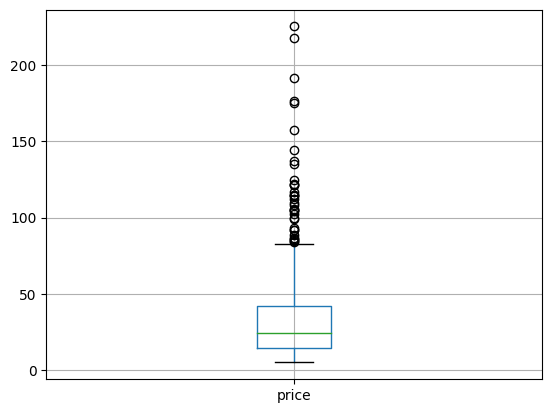

In [44]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

graph = df_merge.boxplot('price')
graph.plot()

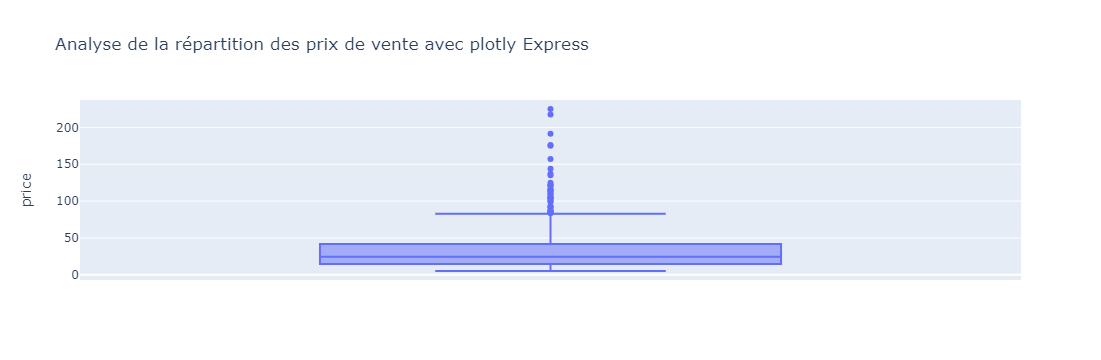

In [45]:
#Autre méthode avec plotly express
import plotly.express as px
df = df_merge
fig = px.box(df, y="price",title = "Analyse de la répartition des prix de vente avec plotly Express")
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [46]:
#Calculer la moyenne du prix
import numpy as ny
moyenne = round(ny.mean(df_merge['price']),2)
print('la moyenne des prix de vente est :',moyenne)

#Calculer l'écart-type du prix
ecart_type = round(ny.std(df_merge['price']),2)
print('\nl\'écart type des prix de vente est :',ecart_type)

#Calculer le Z-score
import scipy.stats as stats
zscore = round(stats.zscore(df_merge['price']),2)
df_merge['zscore']=zscore

la moyenne des prix de vente est : 32.35

l'écart type des prix de vente est : 26.61


In [47]:
#Quel est le seuil prix dont z-score est supérieur à 3?
res =df_merge[df_merge['zscore']>3]
mini = min(res['price'])
print('le seuil de prix dont le zscore est supérieur à 3 est :',mini)
print('\nle nombre de prix concerné est :',len(res))


le seuil de prix dont le zscore est supérieur à 3 est : 114.0

le nombre de prix concerné est : 17


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [48]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()


product_id  onsale_web       price  stock_quantity  purchase_price  \
count   822.000000  822.000000  822.000000      822.000000      822.000000   
mean   5162.164234    0.871046   32.350304       21.658151       16.978954   
std     902.313894    0.335353   26.622453       21.931711       14.573563   
min    3847.000000    0.000000    5.200000        0.000000        2.740000   
25%    4348.500000    1.000000   14.600000        7.000000        7.627500   
50%    4905.500000    1.000000   24.400000       18.000000       12.740000   
75%    5804.750000    1.000000   42.000000       30.000000       22.027500   
max    7338.000000    1.000000  225.000000      145.000000      137.810000   

       total_sales      zscore  
count   822.000000  822.000000  
mean      7.002433    0.000182  
std       4.732554    1.000488  
min       0.000000   -1.020000  
25%       4.000000   -0.670000  
50%       7.000000   -0.300000  
75%      10.000000    0.360000  
max      36.000000    7.240000

In [49]:
#Définissez un seuil pour les articles "outliers" en prix
q1 = ny.quantile(df_merge['price'], .25) #valeur à partir de laquelle 25% des produits ont un prix inférieur
q2= ny.quantile(df_merge['price'], .50) # valeur à partir de laquelle 50% des produits ont un prix inférieur / et 50% supérieur
q3 = ny.quantile(df_merge['price'], .75) #valeur à partir de laquelle 75% des produits ont un prix supérieur
print("Q1 quantile du prix : ", q1)
print("Q2 quantile du prix : ", q2)
print("Q3 quantile du prix : ", q3)

ei = q3-q1
print ('\nEcart interquantile :',ei)

ecart_plus =q3+1.5*ei
print('Valeur à partir de laquelle, on considère les valeurs de prix aberrantes :',ecart_plus)

Q1 quantile du prix :  14.6
Q2 quantile du prix :  24.4
Q3 quantile du prix :  42.0

Ecart interquantile : 27.4
Valeur à partir de laquelle, on considère les valeurs de prix aberrantes : 83.1


In [50]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

nb_produit = len(df_merge[df_merge['price']>ecart_plus])
print('\n Nombre articles concernés : ',nb_produit)
res=df_merge[df_merge['price']>ecart_plus]
nb_total = len(df_merge['product_id'])
print('\n Cela représente : ',round(nb_produit/nb_total*100,2), ' % des produits du catalogue\n')
#res


 Nombre articles concernés :  36

 Cela représente :  4.38  % des produits du catalogue



In [51]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Suivant le produit l'outlier peut etre justifié (champagne à 200€, bouteilles de vin grand cru etc.. Mise en avant via wordcloud des mots recurrents

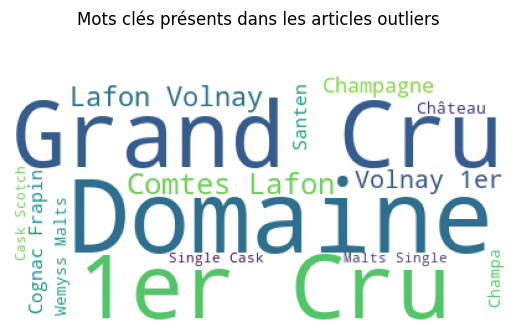

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texte = str(res['post_title'])
exclure_mots = ['la','le','les','de','du','des','NaN']

wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots,max_words = 15).generate(texte)
plt.imshow(wordcloud)
plt.axis("off")
plt.title ("Mots clés présents dans les articles outliers\n\n")
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [53]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA_article']=df_merge['price']*df_merge['total_sales']

#Calculez la somme de la colonne "ca_par_article"

CA_Total=int(df_merge['CA_article'].sum())

print('Le CA total du site web est : {:,} €'.format(CA_Total).replace(',',' '))
#Ce résultat correspond au chiffre d'affaire du site web

Le CA total du site web est : 143 810 €


In [54]:
df_merge.head(50)

product_id  onsale_web  price  stock_quantity stock_status  \
0         3847           1  24.20              16      instock   
1         3849           1  34.30              10      instock   
2         3850           1  20.80               0   outofstock   
3         4032           1  14.10              26      instock   
4         4039           1  46.00               3      instock   
5         4040           1  34.30              12      instock   
6         4041           1  32.70              12      instock   
7         4042           1  31.20              15      instock   
8         4043           1  60.00               0   outofstock   
9         4045           1  42.60               5      instock   
10        4046           1  80.00               2      instock   
11        4047           1  18.30               0   outofstock   
12        4048           1  22.80              24      instock   
13        4049           1  19.30              25      instock   
14        4050           1  21.80              42      instock   
15        4051           1   7.70               0   outofstock   
16        4052           1  33.70               0   outofstock   
17        4053           1  44.30               7      instock   
18        4054           1  71.60               6      instock   
19        4055           0  86.10               0   outofstock   
20        4056           1  12.70              38      instock   
21        4057           1   8.70              29      instock   
22        4058           1   8.70              39      instock   
23        4059           1   8.70              34      instock   
24        4060           1  11.90              29      instock   
25        4062           1  11.90              30      instock   
26        4063           1  14.50              33      instock   
27        4064           1  14.40              32      instock   
28        4065           1  19.50               0   outofstock   
29        4066           1  20.80              27      instock   
30        4067           1  22.00              22      instock   
31        4068           1  16.60              25      instock   
32        4069           1  60.00               4      instock   
33        4070           1  23.40              32      instock   
34        4071           1  33.20              19      instock   
35        4072           1  32.00               8      instock   
36        4073           1  77.80               8      instock   
37        4074           1  12.70              30      instock   
38        4075           1  14.70              35      instock   
39        4076           1  14.05              32      instock   
40        4077           1  22.90              34      instock   
41        4078           1  44.00               8      instock   
42        4079           1  37.00               0   outofstock   
43        4081           1  39.00               6      instock   
44        4083           1  17.00              21      instock   
45        4084           1  23.20              23      instock   
46        4085           1  19.00              27      instock   
47        4086           1  16.40              30      instock   
48        4087           1  14.40              15      instock   
49        4090           0  73.00               0   outofstock   

    purchase_price id_web _merge    sku  total_sales product_type  \
0            12.88  15298   both  15298          6.0          Vin   
1            17.54  15296   both  15296          9.0          Vin   
2            10.64  15300   both  15300          0.0          Vin   
3             6.92  19814   both  19814         12.0          Vin   
4            23.77  19815   both  19815          3.0          Vin   
5            18.25  15303   both  15303          7.0          Vin   
6            17.57  14975   both  14975          6.0          Vin   
7            15.48  16042   both  16042          8.0          Vin   
8            29.

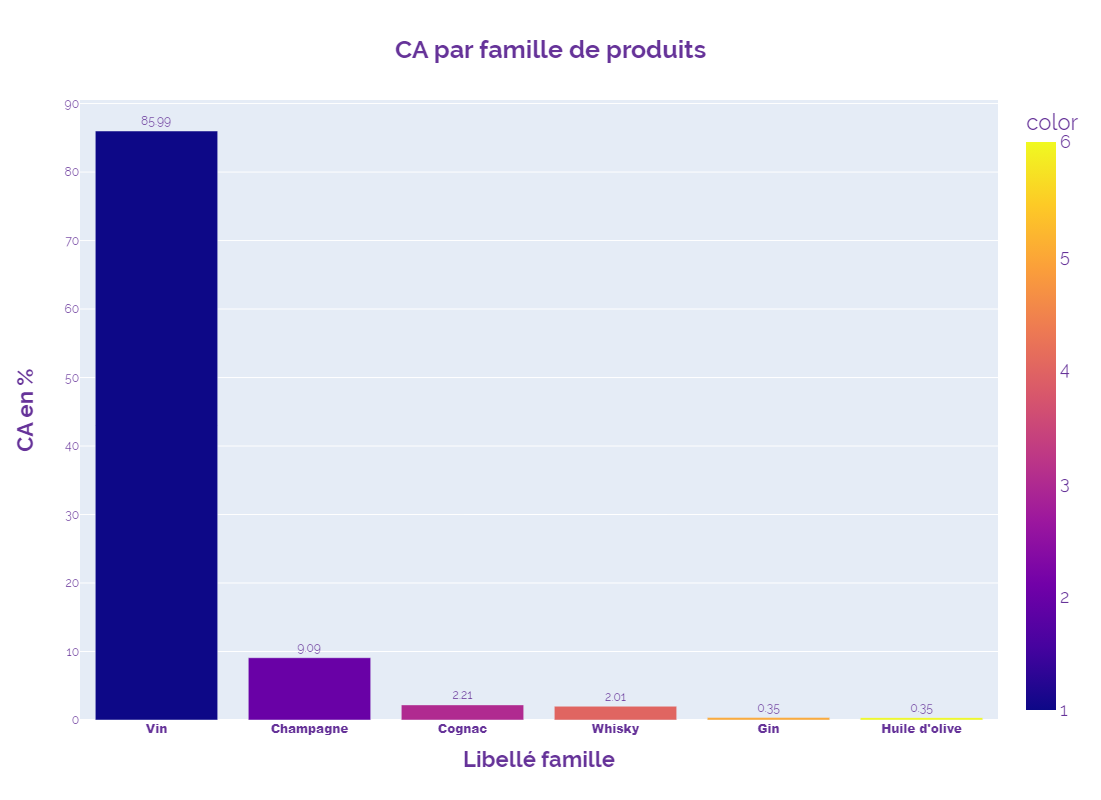

In [55]:
#calcul de la valeur de stock par famille de produit

df_ca_famille=df_merge.groupby("product_type").agg(CA_article=("CA_article","sum"))
df_ca_famille.sort_values(by='CA_article',ascending = False, inplace= True)

#définition des variables
data = df_ca_famille['CA_article']/df_ca_famille['CA_article'].sum()*100

libelle = {"product_type":"<b>Libellé famille</b>","value":"<b>CA en %</b>"}
hauteur = 800
largeur = 1200

couleur = [1,2,3,4,5,6]
texte=round(data,2)
titre = "<b> CA par famille de produits </b>"
fig=px.bar(data,title=titre,labels=libelle,orientation='v',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="outside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> CA par famille de produits </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)

fig.show()   

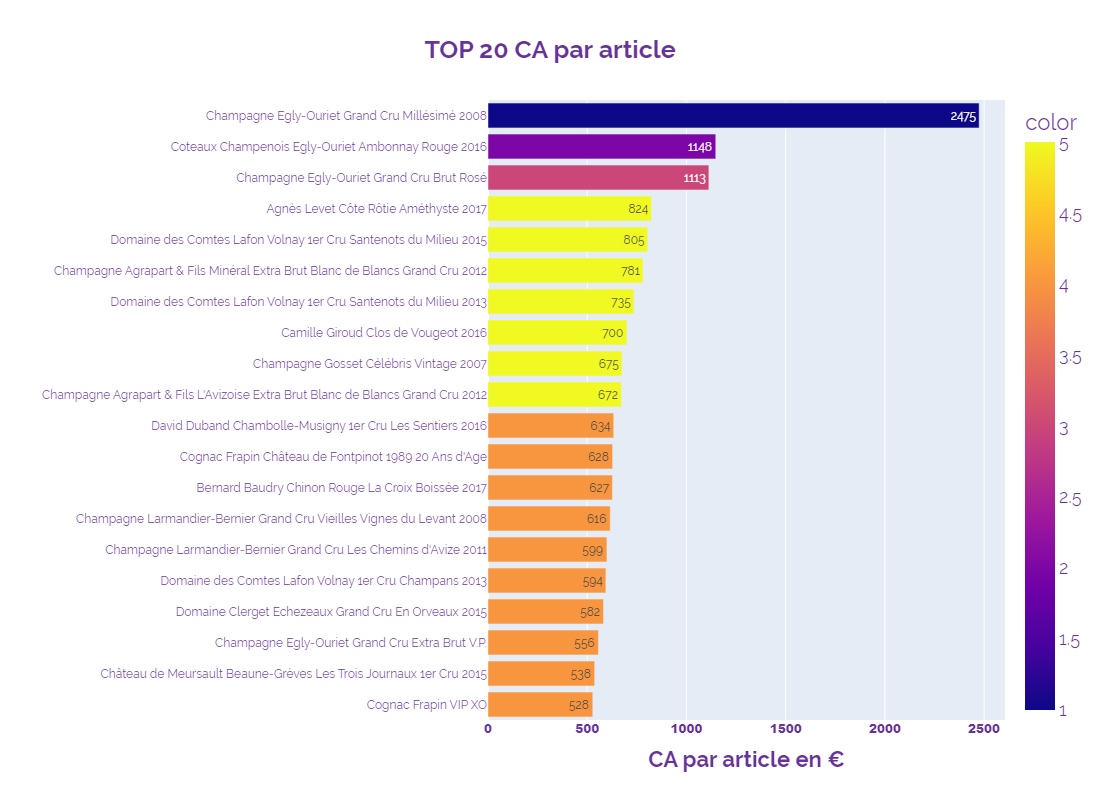

In [56]:

###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

df_merge.sort_values(by='CA_article',ascending = False, inplace= True)
df_merge.head(20)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
df_merge.head(20)

#Graphique en barre des 20 premiers articles avec plotly express
top20_CA=df_merge.head(20)

#reclassement pour faire apparaitre les données les plus importantes en haut du graphique
top20_CA.sort_values(by='CA_article',ascending = True, inplace= True) 

#définition des variables
data = top20_CA
x='CA_article'
y='post_title'
titre = "<b> TOP CA par article </b>"

libelle = {"post_title":"","CA_article":"<b>CA par article en €</b>"}
hauteur = 800
largeur = 1200
#couleur = top20_CA['CA_article']
couleur = [4, 4, 4,4, 4, 4,4,4,4,4,5,5,5,5,5,5,5,3, 2, 1]
texte=round(top20_CA['CA_article'],0)

fig=px.bar(data,x=x,y=y,title=titre,labels=libelle,orientation='h',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> TOP 20 CA par article </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)

fig.show()        

In [57]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['pourcentage_ca']=df_merge['CA_article']/CA_Total*100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
#pas d'interet : 100

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#le dataframe est déjà indexé en CA décroissant
i=0
total=0
nb_enregistrements = len(df_merge['product_id'])
while i<nb_enregistrements and total <=80:
    total = total+df_merge.loc[i,'pourcentage_ca']
    i=i+1
print ('la somme atteinte est :',round(total,2),'%\n')
print ('le nombre d\'article correspond à 80% du CA est :',i,'\n')

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

resultat = round(i/(len(df_merge['sku']))*100,2)
print ('Cela représente',resultat,'% d\'articles du catalogue')

la somme atteinte est : 80.01 %

le nombre d'article correspond à 80% du CA est : 435 

Cela représente 52.92 % d'articles du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [58]:
nb_vente_total=int(df_merge['total_sales'].sum())
print('Le nombre total d\'articles vendus est : {}'.format(nb_vente_total))
#Ce résultat correspond au nombre de produits vendus sur le mois

Le nombre total d'articles vendus est : 5756


In [59]:
#nombre produits en stock

df_pas_sortis = df_merge[df_merge['total_sales']==0]
pas_vendus = (df_pas_sortis[df_merge['stock_quantity']>0]['product_id'].count())
print('Le nombre de produits en stock sans vente est' , pas_vendus)

Le nombre de produits en stock sans vente est 65


In [61]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales',ascending = False, inplace= True)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
pd.set_option('display.max_columns', 20) 
df_merge.head(20)

product_id  onsale_web  price  stock_quantity stock_status  \
0         4867           1    9.9             121      instock   
1         4203           1    9.9              74      instock   
2         4275           1   14.9              62      instock   
3         4726           1   12.7               0   outofstock   
4         4647           1   28.5              45      instock   
5         5826           1   41.2              34      instock   
6         6129           1    5.2              68      instock   
7         4220           1   11.6              48      instock   
8         5803           1   17.1              47      instock   
9         6569           1   29.0              58      instock   
10        5778           1    5.8              44      instock   
11        5777           1    5.7              51      instock   
12        5695           1    6.5              33      instock   
13        4188           1    9.5              51      instock   
14        4870           1    9.3               0   outofstock   
15        4059           1    8.7              34      instock   
16        4105           1    6.8              45      instock   
17        4863           1    8.2              54      instock   
18        4861           1    8.5              36      instock   
19        4223           1    9.7              42      instock   

    purchase_price id_web _merge    sku  total_sales product_type  \
0             4.86  16148   both  16148         36.0          Vin   
1             5.01  15415   both  15415         27.0          Vin   
2             7.78  14864   both  14864         24.0          Vin   
3             6.82  14950   both  14950         22.0          Vin   
4            14.14  16525   both  16525         22.0          Vin   
5            21.71  15325   both  15325         20.0          Vin   
6             2.74  14570   both  14570         20.0          Vin   
7             5.75  15758   both  15758         18.0          Vin   
8             9.19  13572   both  13572         17.0          Vin   
9            15.28  15705   both  15705         17.0          Vin   
10            3.09  15561   both  15561         17.0          Vin   
11            3.03  14338   both  14338         16.0          Vin   
12            3.53  16304   both  16304         16.0          Vin   
13            5.06  16265   both  16265         16.0          Vin   
14            4.81  16149   both  16149         16.0          Vin   
15            4.32  16275   both  16275         16.0          Vin   
16            3.51  16504   both  16504         16.0          Vin   
17            4.11  16255   both  16255         16.0          Vin   
18            4.17  15307   both  15307         15.0          Vin   
19            4.81  16585   both  16585         15.0          Vin   

                                           post_title  zscore  CA_article  \
0   Château De La Selve IGP Coteaux de l'Ardèche M...   -0.84       356.4   
1   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...   -0.84       267.3   
2               I Fabbri Chianti Classico Lamole 2017   -0.66       357.6   
3            François Baur Pinot Noir Schlittweg 2017   -0.74       279.4   
4   Bernard Baudry Chinon Rouge La Croix Boissée 2017   -0.14       627.0   
5               Agnès Levet Côte Rôtie Améthyste 2017    0.33       824.0   
6   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...   -1.02       104.0   
7   Xavier Frissant Touraine Amboise Chenin Les Pi...   -0.78       208.8   
8                Château Tour Haut-Caussan Médoc 2015   -0.57       290.7   
9                Decelle-Villa Chorey-Lès-Beaune 2016   -0.13       493.0   
10                       Maurel Pays d'Oc Merlot 2018   -1.00        98.6   
11           Maurel Pays d'Oc Cabernet-Sauvignon 2017   -1.00        91.2   
12    Philippe Nusswitz IGP Cévènnes Rosé O Pale 2019   -0.97       104.0   
13  Château de La Liquière Languedoc Blanc Les Ama...   -0.86       152.0   
14          

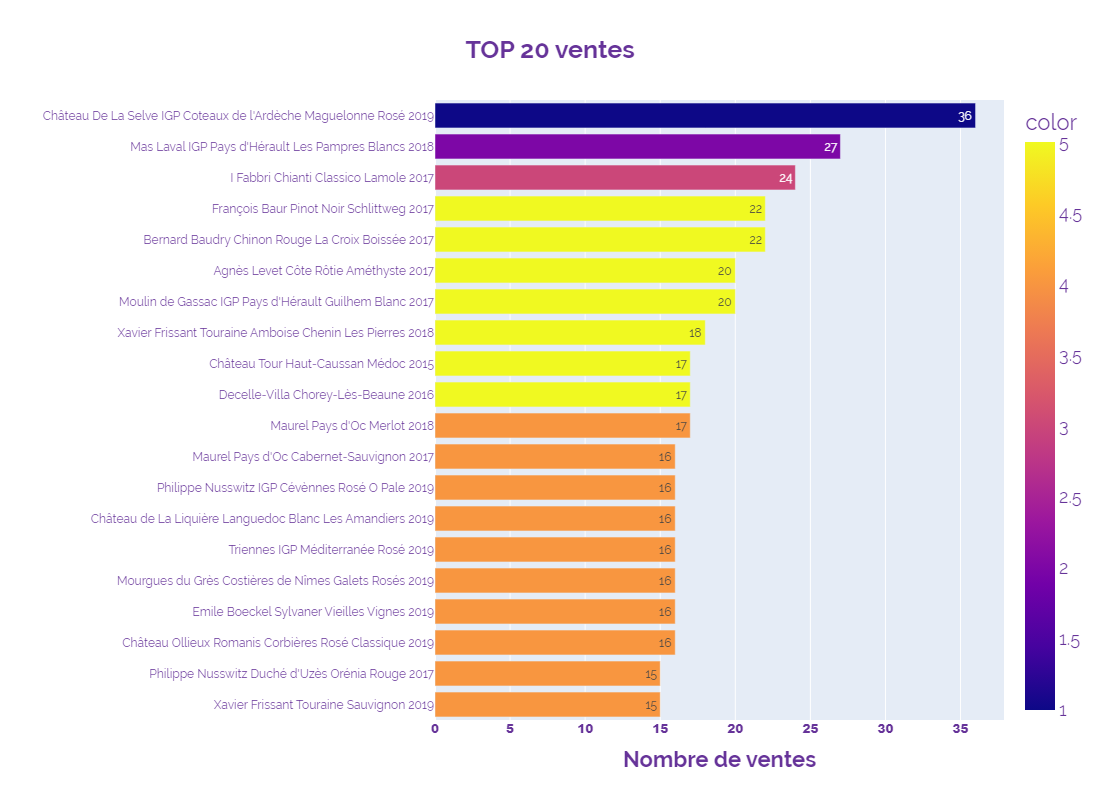

In [62]:
#Graphique en barre des 20 premiers articles avec plotly express
top20_vente=df_merge.head(20)
top20_vente.sort_values(by='total_sales',ascending = True, inplace= True)

#définition des variables
data = top20_vente
x='total_sales'
y='post_title'

libelle = {"post_title":"","total_sales":"<b>Nombre de ventes</b>"}
hauteur = 800
largeur = 1200
#couleur = top20_vente['CA_article']
couleur = [4, 4, 4,4, 4, 4,4,4,4,4,5,5,5,5,5,5,5,3, 2, 1]
texte=round(top20_vente['total_sales'],0)

fig=px.bar(data,x=x,y=y,title=titre,labels=libelle,orientation='h',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> TOP 20 ventes </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)

fig.show()                 

In [63]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
qty_total = int(df_merge['total_sales'].sum())
df_merge['pourcentage_qty']=df_merge['total_sales']/qty_total*100
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
#aucun interet 100
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
i=0
total=0
nb_enregistrements = len(df_merge['product_id'])
while i<nb_enregistrements and total <=80:
    total = total+df_merge.loc[i,'pourcentage_qty']
    i=i+1
print ('la somme atteinte est :',round(total,2),'%\n')
print ('le nombre d\'article correspond à 80% des quantités est :',i,'\n')

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
resultat = round(i/(len(df_merge['sku']))*100,2)
print ('Ces articles representent',resultat,'% du catalogue du site\n')

la somme atteinte est : 80.04 %

le nombre d'article correspond à 80% des quantités est : 434 

Ces articles representent 52.8 % du catalogue du site



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [64]:
######################################
# Calcule le nombre de mois de stock #
######################################
#Import de numpy 
import numpy as ny
#Création de la colonne Rotation de stock
df_merge['rotation_stock']= round(df_merge['stock_quantity']/df_merge['total_sales'],2)

#Remplacement des "inf" par 0
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace(ny.nan, 0)
df_merge['rotation_stock'] = df_merge['rotation_stock'].replace(ny.inf, 0)
df_merge.head(20)



product_id  onsale_web  price  stock_quantity stock_status  \
0         4867           1    9.9             121      instock   
1         4203           1    9.9              74      instock   
2         4275           1   14.9              62      instock   
3         4726           1   12.7               0   outofstock   
4         4647           1   28.5              45      instock   
5         5826           1   41.2              34      instock   
6         6129           1    5.2              68      instock   
7         4220           1   11.6              48      instock   
8         5803           1   17.1              47      instock   
9         6569           1   29.0              58      instock   
10        5778           1    5.8              44      instock   
11        5777           1    5.7              51      instock   
12        5695           1    6.5              33      instock   
13        4188           1    9.5              51      instock   
14        4870           1    9.3               0   outofstock   
15        4059           1    8.7              34      instock   
16        4105           1    6.8              45      instock   
17        4863           1    8.2              54      instock   
18        4861           1    8.5              36      instock   
19        4223           1    9.7              42      instock   

    purchase_price id_web _merge    sku  total_sales product_type  \
0             4.86  16148   both  16148         36.0          Vin   
1             5.01  15415   both  15415         27.0          Vin   
2             7.78  14864   both  14864         24.0          Vin   
3             6.82  14950   both  14950         22.0          Vin   
4            14.14  16525   both  16525         22.0          Vin   
5            21.71  15325   both  15325         20.0          Vin   
6             2.74  14570   both  14570         20.0          Vin   
7             5.75  15758   both  15758         18.0          Vin   
8             9.19  13572   both  13572         17.0          Vin   
9            15.28  15705   both  15705         17.0          Vin   
10            3.09  15561   both  15561         17.0          Vin   
11            3.03  14338   both  14338         16.0          Vin   
12            3.53  16304   both  16304         16.0          Vin   
13            5.06  16265   both  16265         16.0          Vin   
14            4.81  16149   both  16149         16.0          Vin   
15            4.32  16275   both  16275         16.0          Vin   
16            3.51  16504   both  16504         16.0          Vin   
17            4.11  16255   both  16255         16.0          Vin   
18            4.17  15307   both  15307         15.0          Vin   
19            4.81  16585   both  16585         15.0          Vin   

                                           post_title  zscore  CA_article  \
0   Château De La Selve IGP Coteaux de l'Ardèche M...   -0.84       356.4   
1   Mas Laval IGP Pays d'Hérault Les Pampres Blanc...   -0.84       267.3   
2               I Fabbri Chianti Classico Lamole 2017   -0.66       357.6   
3            François Baur Pinot Noir Schlittweg 2017   -0.74       279.4   
4   Bernard Baudry Chinon Rouge La Croix Boissée 2017   -0.14       627.0   
5               Agnès Levet Côte Rôtie Améthyste 2017    0.33       824.0   
6   Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...   -1.02       104.0   
7   Xavier Frissant Touraine Amboise Chenin Les Pi...   -0.78       208.8   
8                Château Tour Haut-Caussan Médoc 2015   -0.57       290.7   
9                Decelle-Villa Chorey-Lès-Beaune 2016   -0.13       493.0   
10                       Maurel Pays d'Oc Merlot 2018   -1.00        98.6   
11           Maurel Pays d'Oc Cabernet-Sauvignon 2017   -1.00        91.2   
12    Philippe Nusswitz IGP Cévènnes Rosé O Pale 2019   -0.97       104.0   
13  Château de La Liquière Languedoc Blanc Les Ama...   -0.86       152.0   
14          

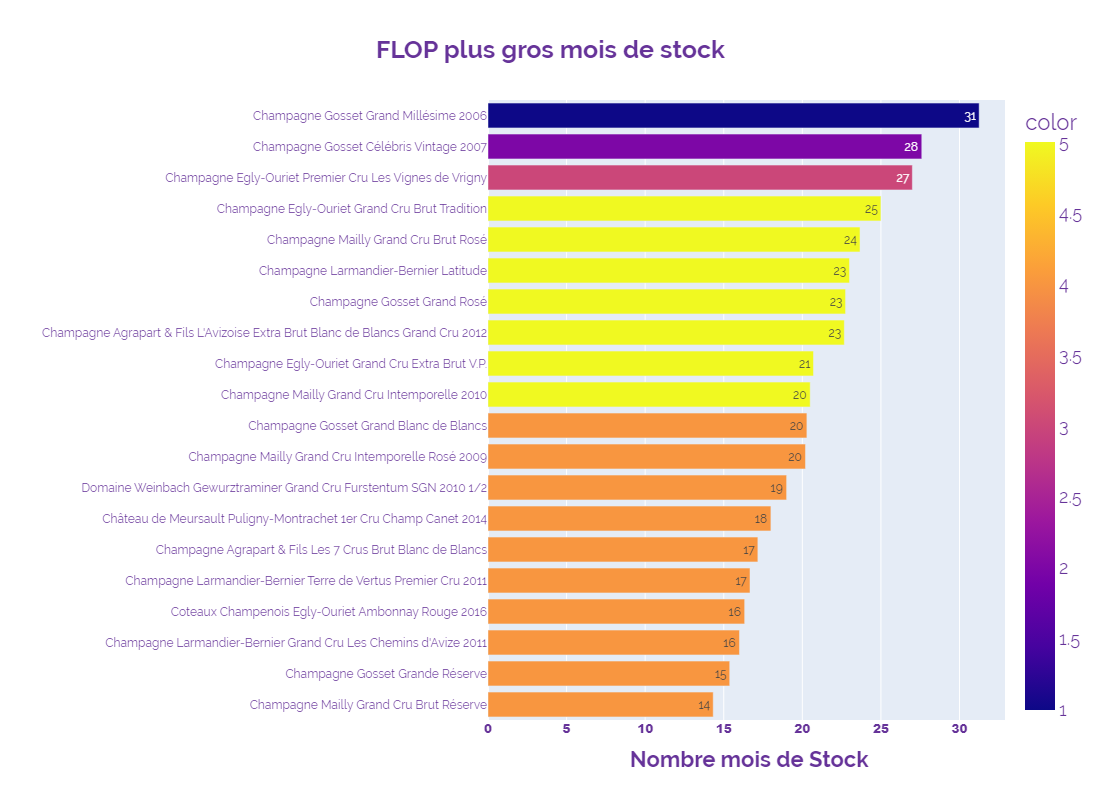

In [65]:
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge.sort_values(by='rotation_stock',ascending = False, inplace= True)
df_merge.reset_index(drop=True, inplace=True)
df_merge.head(50)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
top20_stock=df_merge.head(20)
top20_stock.sort_values(by='rotation_stock',ascending = True, inplace= True)

#définition des variables
data = top20_stock
x='rotation_stock'
y='post_title'

libelle = {"post_title":"","rotation_stock":"<b> Nombre mois de Stock</b>"}
hauteur = 800
largeur = 1200
#couleur = top20_stock['CA_article']
couleur = [4, 4, 4,4, 4, 4,4,4,4,4,5,5,5,5,5,5,5,3, 2, 1]
texte=round(top20_stock['rotation_stock'],0)

fig=px.bar(data,x=x,y=y,title=titre,labels=libelle,orientation='h',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> FLOP plus gros mois de stock </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)

fig.show()       

In [66]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
#Calculer la somme de la colonne "Valorisation_stock_euros"

df_merge['valorisation_stock']=df_merge['stock_quantity']*df_merge['purchase_price']

df_merge.head(20)

product_id  onsale_web  price  stock_quantity stock_status  \
0         4142           1   53.0             125      instock   
1         6126           1  135.0             138      instock   
2         4356           1   51.6              81      instock   
3         4348           1   59.0             125      instock   
4         4148           1   37.5              71      instock   
5         4357           1   39.0             115      instock   
6         4144           1   49.0              91      instock   
7         5025           1  112.0             136      instock   
8         4350           1   79.5             145      instock   
9         4150           1   59.0             123      instock   
10        4334           1   49.0             142      instock   
11        4149           1   69.0             101      instock   
12        5612           1  124.8              19      instock   
13        4582           1  109.6              18      instock   
14        5024           1   45.0             103      instock   
15        4970           1   49.5             100      instock   
16        5892           1  191.3              98      instock   
17        4359           1   85.6             112      instock   
18        4141           1   39.0             123      instock   
19        4146           1   29.5              86      instock   

    purchase_price id_web _merge    sku  total_sales product_type  \
0            32.15  11641   both  11641          4.0    Champagne   
1            80.33  14923   both  14923          5.0    Champagne   
2            31.00  12585   both  12585          3.0    Champagne   
3            34.76  12586   both  12586          5.0    Champagne   
4            21.88   1364   both   1364          3.0    Champagne   
5            22.30   9562   both   9562          5.0    Champagne   
6            27.73   1662   both   1662          4.0    Champagne   
7            68.60  13914   both  13914          6.0    Champagne   
8            47.30  12588   both  12588          7.0    Champagne   
9            35.45   1366   both   1366          6.0    Champagne   
10           30.01   7818   both   7818          7.0    Champagne   
11           40.25   7086   both   7086          5.0    Champagne   
12           66.41  14915   both  14915          1.0          Vin   
13           53.80  12857   both  12857          1.0          Vin   
14           27.04  11996   both  11996          6.0    Champagne   
15           28.59  11225   both  11225          6.0    Champagne   
16          116.06  14983   both  14983          6.0    Champagne   
17           51.93  13853   both  13853          7.0    Champagne   
18           24.86    304   both    304          8.0    Champagne   
19           17.55   1360   both   1360          6.0    Champagne   

                                           post_title  zscore  CA_article  \
0               Champagne Gosset Grand Millésime 2006    0.78       212.0   
1              Champagne Gosset Célébris Vintage 2007    3.86       675.0   
2   Champagne Egly-Ouriet Premier Cru Les Vignes d...    0.72       154.8   
3      Champagne Egly-Ouriet Grand Cru Brut Tradition    1.00       295.0   
4                Champagne Mailly Grand Cru Brut Rosé    0.19       112.5   
5               Champagne Larmandier-Bernier Latitude    0.25       195.0   
6                         Champagne Gosset Grand Rosé    0.63       196.0   
7   Champagne Agrapart &amp; Fils L'Avizoise Extra...    2.99       672.0   
8     Champagne Egly-Ouriet Grand Cru Extra Brut V.P.    1.77       556.5   
9        Champagne Mailly Grand Cru Intemporelle 2010    1.00       354.0   
10             Champagne Gosset Grand Blanc de Blancs    0.63       343.0   
11  Champagne Mailly Grand Cru Intemporelle Rosé 2009    1.38       345.0   
12  Domaine Weinbach Gewurztraminer Grand Cru Furs...    3.47       124.8   
13  Château de Meursault Puligny-Montrachet 1er Cr...    2.90       109.6   
14  Champagn

In [67]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
valeur_totale_stock = int(df_merge['valorisation_stock'].sum())
print('la valeur de stock est de : {:,}€'.format(valeur_totale_stock).replace(","," "))

la valeur de stock est de : 298 540€


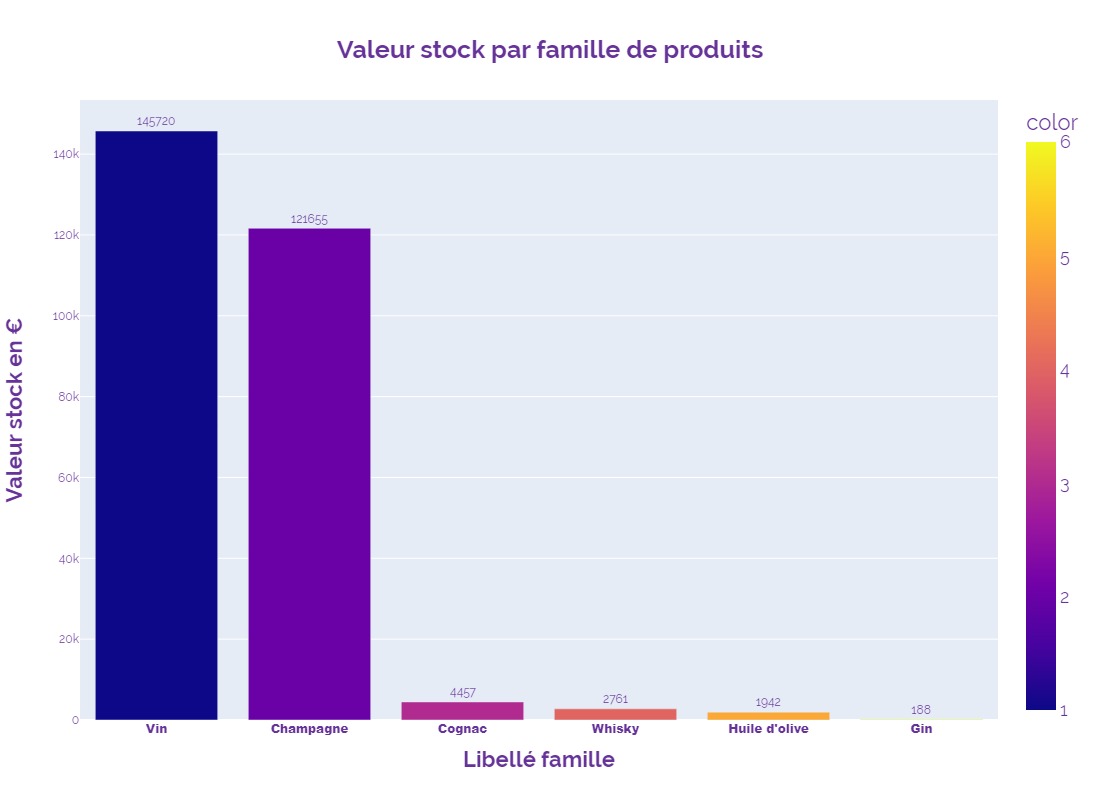

In [68]:
#calcul de la valeur de stock par famille de produit

df_merge['valeur_stock_article']=df_merge['valorisation_stock']
df_merge['valeur_stock_article']=ny.array(df_merge['valeur_stock_article'],int) #passage en integer

df_stock=df_merge.groupby("product_type").agg(valeur_stock_article=("valeur_stock_article","sum"))
df_stock.sort_values(by='valeur_stock_article',ascending = False, inplace= True)

#définition des variables
df_stock.sort_values(by='valeur_stock_article',ascending = False, inplace= True)
data = df_stock['valeur_stock_article'] 

libelle = {"product_type":"<b>Libellé famille</b>","value":"<b>Valeur stock en €</b>"}
hauteur = 800
largeur = 1200

couleur = [1,2,3,4,5,6]
texte=round(df_stock['valeur_stock_article'],0)

fig=px.bar(data,title=titre,labels=libelle,orientation='v',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="outside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> Valeur stock par famille de produits </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)

fig.show()   

In [69]:
#classement valeur de stock par type de produit
df_vin = df_merge[df_merge['product_type']=='Vin']
df_vin.sort_values(by='valeur_stock_article',ascending = False, inplace= True)
suppr_colonnes = ['product_id','price','purchase_price','total_sales','pourcentage_ca',
                  'onsale_web','stock_status','id_web','_merge','sku','zscore','pourcentage_qty',
                  'valorisation_stock']
sel_colonne = ['product_type','post_title','CA_article','stock_quantity','rotation_stock','valeur_stock_article']
df_vin.loc[:,sel_colonne]
df_vin=df_vin.drop(suppr_colonnes, axis=1)
df_vin=df_vin.loc[:,sel_colonne].head(7)
df_vin

product_type                                         post_title  \
29           Vin     David Duband Charmes-Chambertin Grand Cru 2014   
12           Vin  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
207          Vin                Camille Giroud Clos de Vougeot 2016   
13           Vin  Château de Meursault Puligny-Montrachet 1er Cr...   
380          Vin  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
290          Vin  David Duband Chambolle-Musigny 1er Cru Les Sen...   
66           Vin               Decelle-Villa Chorey-Lès-Beaune 2016   

     CA_article  stock_quantity  rotation_stock  valeur_stock_article  
29        435.0              18            9.00                  2103  
12        124.8              19           19.00                  1261  
207       700.0              12            3.00                  1085  
13        109.6              18           18.00                   968  
380       805.0              16            2.29                   950  
290       633.6              16            2.67                   916  
66        493.0              58            3.41                   886

In [70]:
#classement CA par type de produit
df_vin = df_merge[df_merge['product_type']=='Vin']
df_vin.sort_values(by='CA_article',ascending = False, inplace= True)
suppr_colonnes = ['product_id','price','purchase_price','pourcentage_ca',
                  'onsale_web','stock_status','id_web','_merge','sku','zscore','pourcentage_qty',
                  'valorisation_stock']
sel_colonne = ['product_type','post_title','stock_quantity','rotation_stock','total_sales','CA_article']
df_vin.loc[:,sel_colonne]
df_vin=df_vin.drop(suppr_colonnes, axis=1)
df_vin=df_vin.loc[:,sel_colonne].head(10)
df_vin



product_type                                         post_title  \
529          Vin              Agnès Levet Côte Rôtie Améthyste 2017   
380          Vin  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
527          Vin  Domaine des Comtes Lafon Volnay 1er Cru Santen...   
207          Vin                Camille Giroud Clos de Vougeot 2016   
290          Vin  David Duband Chambolle-Musigny 1er Cru Les Sen...   
449          Vin  Bernard Baudry Chinon Rouge La Croix Boissée 2017   
577          Vin  Domaine des Comtes Lafon Volnay 1er Cru Champa...   
346          Vin  Domaine Clerget Echezeaux Grand Cru En Orveaux...   
581          Vin  Château de Meursault Beaune-Grèves Les Trois J...   
526          Vin  Domaine Weinbach Riesling Grand Cru Schlossber...   

     stock_quantity  rotation_stock  total_sales  CA_article  
529              34            1.70         20.0       824.0  
380              16            2.29          7.0       805.0  
527              12            1.71          7.0       735.0  
207              12            3.00          4.0       700.0  
290              16            2.67          6.0       633.6  
449              45            2.05         22.0       627.0  
577               9            1.50          6.0       594.0  
346              12            2.40          5.0       582.0  
581              12            1.50          8.0       537.6  
526              14            1.75          8.0       507.2

In [71]:
#classement valeur de stock par type de produit
df_champagne = df_merge[df_merge['product_type']=='Champagne']
df_champagne.sort_values(by='valeur_stock_article',ascending = False, inplace= True)
suppr_colonnes = ['product_id','price','purchase_price','total_sales','pourcentage_ca',
                  'onsale_web','stock_status','id_web','_merge','sku','zscore','pourcentage_qty',
                  'valorisation_stock']
sel_colonne = ['product_type','post_title','CA_article','stock_quantity']
df_champagne.loc[:,sel_colonne]
df_champagne=df_champagne.drop(suppr_colonnes, axis=1)
df_champagne=df_champagne.loc[:,sel_colonne].head(7)
df_champagne

product_type                                         post_title  \
16     Champagne  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
1      Champagne             Champagne Gosset Célébris Vintage 2007   
7      Champagne  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
710    Champagne     Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
683    Champagne      Champagne Mailly Grand Cru Les Echansons 2007   
8      Champagne    Champagne Egly-Ouriet Grand Cru Extra Brut V.P.   
28     Champagne          Champagne Egly-Ouriet Grand Cru Brut Rosé   

     CA_article  stock_quantity  
16       1147.8              98  
1         675.0             138  
7         672.0             136  
710         0.0              97  
683         0.0             145  
8         556.5             145  
28       1113.0             127

In [72]:
#classement CA par type de produit
df_champagne = df_merge[df_merge['product_type']=='Champagne']
df_champagne.sort_values(by='CA_article',ascending = False, inplace= True)
suppr_colonnes = ['product_id','price','purchase_price','pourcentage_ca',
                  'onsale_web','stock_status','id_web','_merge','sku','zscore','pourcentage_qty',
                  'valorisation_stock']
sel_colonne = ['product_type','post_title','stock_quantity','rotation_stock','total_sales','CA_article']
df_champagne.loc[:,sel_colonne]
df_champagne=df_champagne.drop(suppr_colonnes, axis=1)
df_champagne=df_champagne.loc[:,sel_colonne].head(7)
df_champagne

product_type                                         post_title  \
750    Champagne     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
16     Champagne  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
28     Champagne          Champagne Egly-Ouriet Grand Cru Brut Rosé   
25     Champagne  Champagne Agrapart &amp; Fils Minéral Extra Br...   
1      Champagne             Champagne Gosset Célébris Vintage 2007   
7      Champagne  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
26     Champagne  Champagne Larmandier-Bernier Grand Cru Vieille...   

     stock_quantity  rotation_stock  total_sales  CA_article  
750               0            0.00         11.0      2475.0  
16               98           16.33          6.0      1147.8  
28              127            9.07         14.0      1113.0  
25              101           11.22          9.0       781.2  
1               138           27.60          5.0       675.0  
7               136           22.67          6.0       672.0  
26               81           10.12          8.0       616.0

In [73]:
df_champagne = df_merge[df_merge['product_type']=='Champagne']
df_champagne.sort_values(by='CA_article',ascending = False, inplace= True)
suppr_colonnes = ['product_id','price','purchase_price','total_sales','pourcentage_ca','rotation_stock','onsale_web',
                  'stock_status','id_web','_merge','sku','zscore','pourcentage_qty','valorisation_stock']
df_champagne=df_champagne.drop(suppr_colonnes, axis=1)
df_champagne=df_champagne.head(5)
df_champagne

stock_quantity product_type  \
750               0    Champagne   
16               98    Champagne   
28              127    Champagne   
25              101    Champagne   
1               138    Champagne   

                                            post_title  CA_article  \
750     Champagne Egly-Ouriet Grand Cru Millésimé 2008      2475.0   
16   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...      1147.8   
28           Champagne Egly-Ouriet Grand Cru Brut Rosé      1113.0   
25   Champagne Agrapart &amp; Fils Minéral Extra Br...       781.2   
1               Champagne Gosset Célébris Vintage 2007       675.0   

     valeur_stock_article  
750                     0  
16                  11373  
28                   5830  
25                   5063  
1                   11085

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [74]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['prix_ht']=round(df_merge['price']/coeff_tva,2)
df_merge.head(5)

#Création de la colonne Taux de marge
df_merge['taux_marge']=round((df_merge['prix_ht']-df_merge['purchase_price'])/df_merge['purchase_price']*100,2)
df_merge.head(5)

#Afficher le prix minimum de la colonne "taux_marge"
mini=min(df_merge['taux_marge'])
print('Taux de marge mini :',mini,'%\n')

#Afficher le prix maximum de la colonne "taux_marge"
maxi=max(df_merge['taux_marge'])
print('Taux de marge maxi :',maxi,'%\n')

Taux de marge mini : -86.34 %

Taux de marge maxi : 92.06 %



In [75]:
#affichage de la ligne avec un taux de marge inférieur à 0

df_tauxnegatif = df_merge[df_merge['taux_marge']<0]
df_tauxnegatif.head(len(df_tauxnegatif['product_id']))


product_id  onsale_web  price  stock_quantity stock_status  \
678        7196           0  31.00              55      instock   
703        6324           0  92.00              18      instock   
710        4355           1  12.65              97      instock   
802        4864           0   8.30               0   outofstock   

     purchase_price id_web _merge    sku  total_sales  ...  \
678           31.20   7196   both    NaN          0.0  ...   
703           99.00   6324   both    NaN          0.0  ...   
710           77.48  12589   both  12589          0.0  ...   
802            9.99  15154   both    NaN          0.0  ...   

                                         post_title zscore  CA_article  \
678                                             NaN  -0.05         0.0   
703                                             NaN   2.24         0.0   
710  Champagne Egly-Ouriet Grand Cru Blanc de Noirs  -0.74         0.0   
802                                             NaN  -0.90         0.0   

     pourcentage_ca  pourcentage_qty  rotation_stock  valorisation_stock  \
678             0.0              0.0             0.0             1716.00   
703             0.0              0.0             0.0             1782.00   
710             0.0              0.0             0.0             7515.56   
802             0.0              0.0             0.0                0.00   

     valeur_stock_article  prix_ht  taux_marge  
678                  1716    25.92      -16.92  
703                  1782    76.92      -22.30  
710                  7515    10.58      -86.34  
802                     0     6.94      -30.53  

[4 rows x 21 columns]

In [76]:
#création d'un dataframe avec les taux positifs

df_tauxpositifs = df_merge[df_merge['taux_marge']>0]

#Afficher le prix minimum de la colonne "taux_marge"
mini=min(df_tauxpositifs['taux_marge'])
print('Le taux de marge mini est :',mini,'%\n')

#Afficher le prix maximum de la colonne "taux_marge"
maxi=max(df_tauxpositifs['taux_marge'])
print('Le taux de marge maxi est :',maxi,'%\n')

#Afficher taux marge global

taux_marge_global=round(ny.mean(df_tauxpositifs['taux_marge']),2)
print('Le taux de marge global est :',taux_marge_global,'%\n')

Le taux de marge mini est : 29.89 %

Le taux de marge maxi est : 92.06 %

Le taux de marge global est : 61.85 %



In [77]:
#création d'un dataframe avec le taux de marge moyen par type de produit

df_moyen=df_tauxpositifs.groupby("product_type").agg(taux_marge_type_produit=("taux_marge","mean"))
df_moyen['taux_marge_type_produit']=round(df_moyen['taux_marge_type_produit'],2)
df_moyen.head(5)
df_moyen.sort_values(by='taux_marge_type_produit',ascending = False, inplace= True)

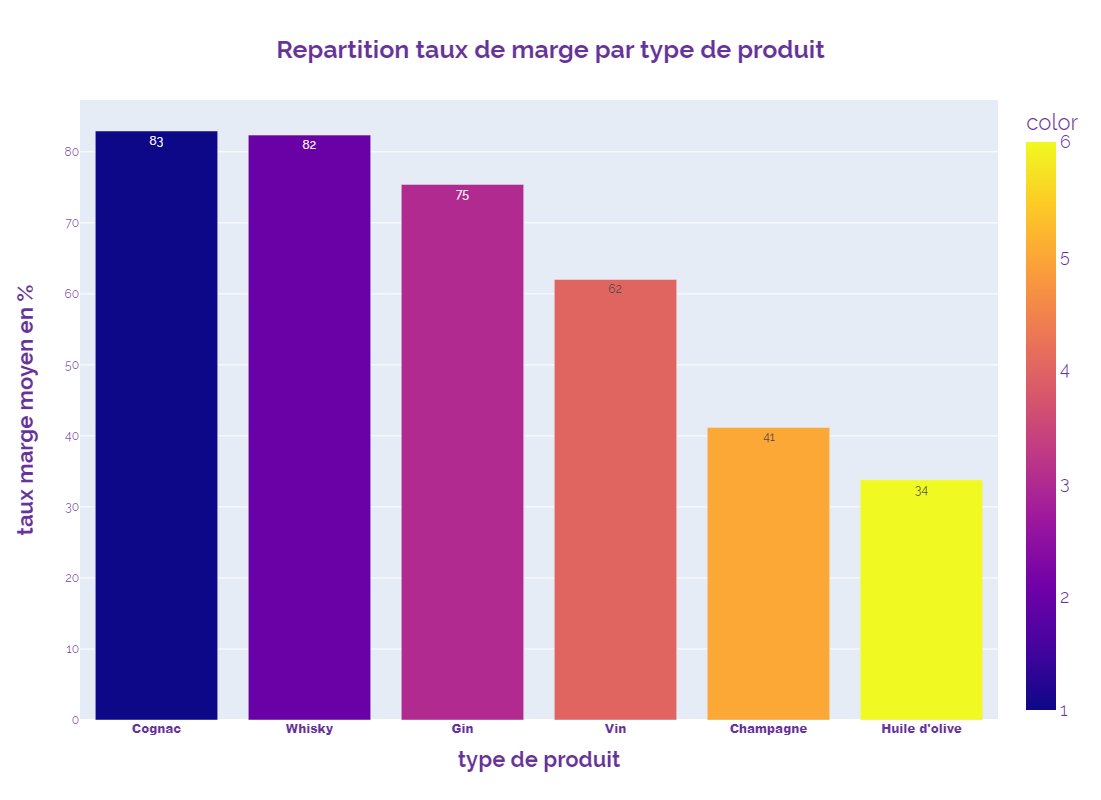

In [78]:
#Affichage dans un graphique du taux de marge par type de produit
#définition des variables
df_moyen.sort_values(by='taux_marge_type_produit',ascending = False, inplace= True)
data = df_moyen['taux_marge_type_produit'] 



libelle = {"product_type":"<b>type de produit</b>","value":"<b>taux marge moyen en %</b>"}
hauteur = 800
largeur = 1200

couleur = [1,2,3,4,5,6]
texte=round(df_moyen['taux_marge_type_produit'],0)

fig=px.bar(data,title=titre,labels=libelle,orientation='v',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> Repartition taux de marge par type de produit </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)


fig.show()   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Analyse du Mix Marge</h3>
</div>

In [79]:
#analyse mix marge
df_merge['valeur_marge']=df_merge['prix_ht']-df_merge['purchase_price']
df_merge['valeur_marge_globale']=df_merge['valeur_marge']*df_merge['total_sales']
df_merge.sort_values(by='valeur_marge_globale',ascending = False, inplace= True)

#calcul valeur marge globale du mois
total_marge = int(df_merge['valeur_marge_globale'].sum())
print('la valeur globale de marge est de : {:,}€'.format(total_marge).replace(","," "))


la valeur globale de marge est de : 45 104€


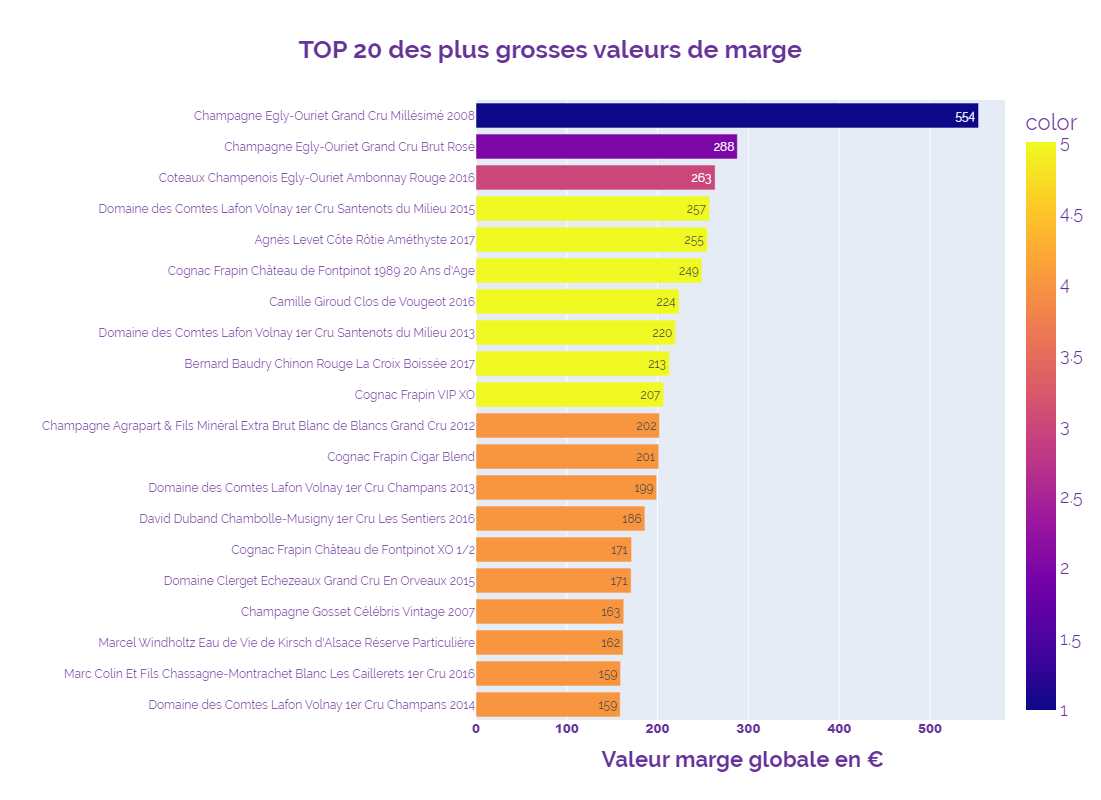

In [80]:
top20_mixmarge=df_merge.head(20)

top20_mixmarge.sort_values(by='valeur_marge_globale',ascending = True, inplace= True)
data = top20_mixmarge

x='valeur_marge_globale'
y='post_title'


libelle = {"post_title":"","valeur_marge_globale":"<b> Valeur marge globale en €</b>"}
hauteur = 800
largeur = 1200
#couleur = top20_mixmarge['valeur_marge_globale']
couleur = [4, 4, 4,4, 4, 4,4,4,4,4,5,5,5,5,5,5,5,3, 2, 1]
texte=round(top20_mixmarge['valeur_marge_globale'],0)

fig=px.bar(data,x=x,y=y,title=titre,labels=libelle,orientation='h',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> TOP 20 des plus grosses valeurs de marge </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)


fig.show()       

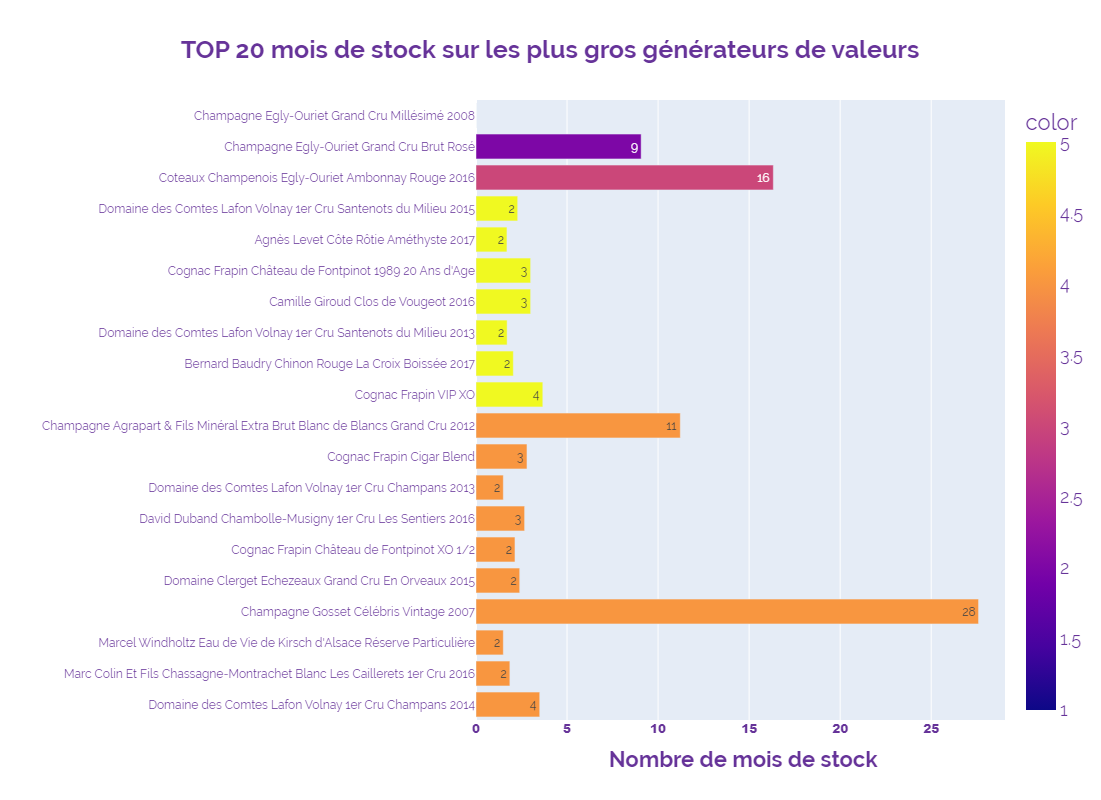

In [81]:
#presenter les produits les plus à risque de rupture
top20_mixmarge.sort_values(by='valeur_marge_globale',ascending = True, inplace= True)

data = top20_mixmarge

x='rotation_stock'
y='post_title'


libelle = {"post_title":"","rotation_stock":"<b> Nombre de mois de stock</b>"}
hauteur = 800
largeur = 1200
#couleur = top20_mixmarge['valeur_marge_globale']
couleur = [4, 4, 4,4, 4, 4,4,4,4,4,5,5,5,5,5,5,5,3, 2, 1]
texte=round(top20_mixmarge['rotation_stock'],0)

fig=px.bar(data,x=x,y=y,title=titre,labels=libelle,orientation='h',height = hauteur, width=largeur, color= couleur,text = texte)

fig.update_traces(
    textposition="inside",selector=dict(type='bar'),
    textfont_size=12,
    opacity = 1)
fig.update_layout(
title={
        'text':"<b> TOP 20 mois de stock sur les plus gros générateurs de valeurs </b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
 font=dict(
        family="raleway",
        size=18,
        color="RebeccaPurple"))
fig.update_xaxes(tickfont_family="Arial Black",tickfont_size=12)
fig.update_yaxes(tickfont_size=12)


fig.show()       

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.7 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

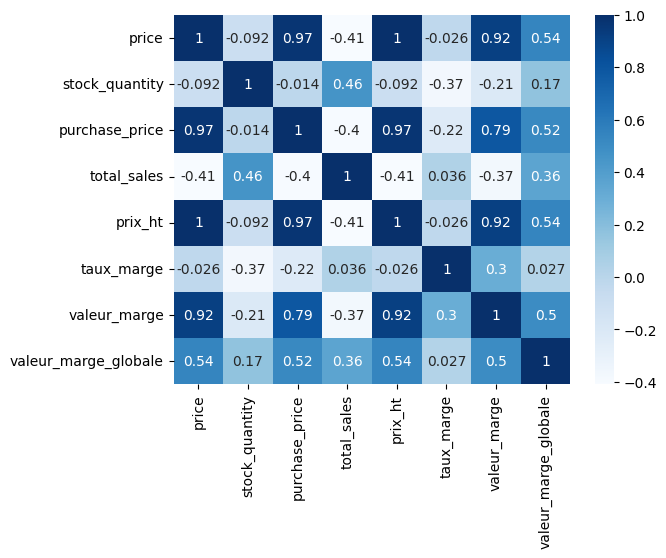

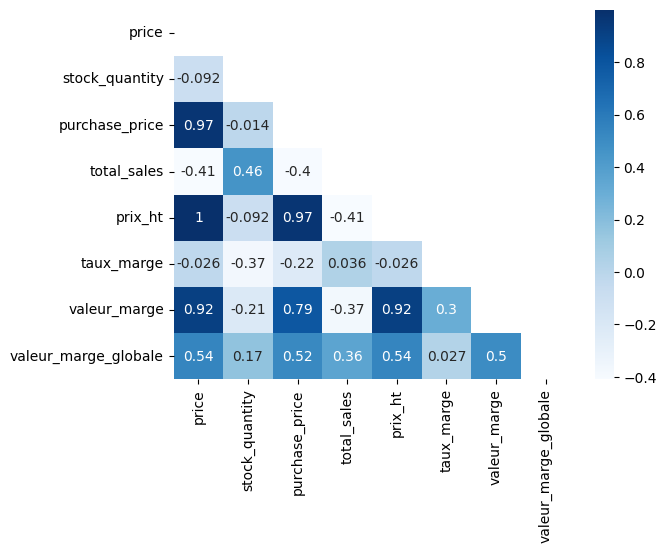

In [82]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price

df_graph = df_merge.copy()

df_graph.drop(columns=['product_id','onsale_web','stock_status','id_web','_merge','sku',
                        'product_type','post_title','zscore','pourcentage_ca','pourcentage_qty',
                        'valorisation_stock','CA_article','rotation_stock','valeur_stock_article'],axis=1,inplace=True)

corr = df_graph.corr() 
sns.heatmap(corr, cmap="Blues", annot= True)
plt.show()

#on peut également créer un mask pour n'afficher qu'une demi heatmap
# creating mask 
mask = ny.triu(ny.ones_like(df_graph.corr())) 
dataplot = sns.heatmap(df_graph.corr(), cmap="Blues", annot=True, mask=mask) 

plt.show()

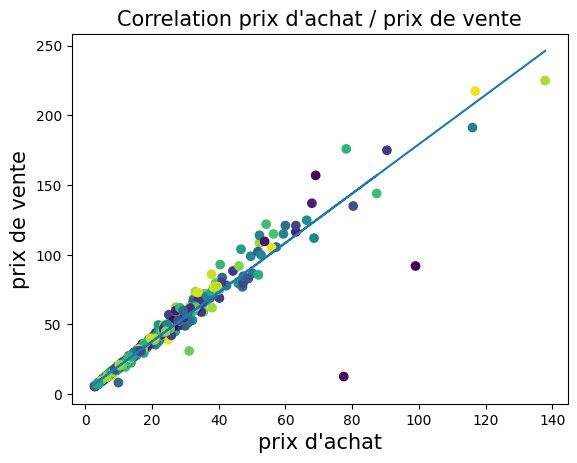

In [83]:
x = df_merge['purchase_price']
y = df_merge['price']
plt.xlabel('prix d\'achat',fontsize=15)
plt.ylabel('prix de vente',fontsize=15)
plt.title('Correlation prix d\'achat / prix de vente',fontsize=15)
colors =ny.random.rand(len(x))
m, b = ny.polyfit(x, y, 1)
plt.scatter(x,y,c=colors)
plt.plot(x,m*x+b)
plt.show()

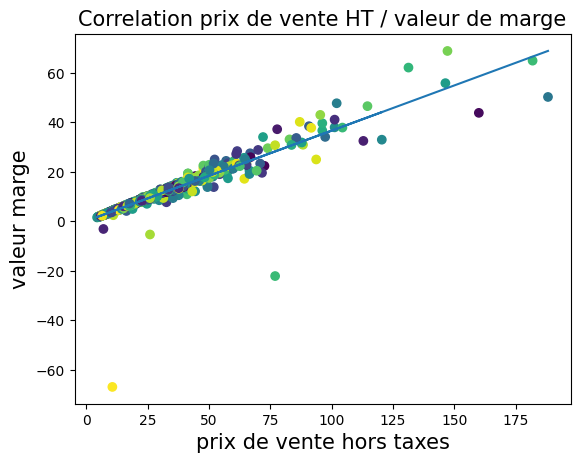

In [84]:
x = df_merge['prix_ht']
y = df_merge['valeur_marge']
plt.xlabel('prix de vente hors taxes',fontsize=15)
plt.ylabel('valeur marge',fontsize=15)
plt.title('Correlation prix de vente HT / valeur de marge',fontsize=15)
colors =ny.random.rand(len(x))
m, b = ny.polyfit(x, y, 1)
plt.scatter(x,y,c=colors)
plt.plot(x,m*x+b)
plt.show()

In [85]:
#Que peut-on conclure des correlations ?
#les prix d'achats et les prix de vente ont, dans la grande majorité des cas, une grande relation entre eux. 
#Les prix de vente HT et les valeurs de marge également

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.7 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [86]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_csv('export.csv',sep=";")